<br> </br>
<font color='darkred' size = 7.5> <center>  <b> Quantitative strategies on high-frequency data </b> </center> </font>
<font color='darkred' size = 5> <center>  8. Applying pair trading strategies </center> </font>
<br>
<font size = 5> <center> prof. Piotr Wójcik </center> </font>
<br> 
<font size = 5> <center>  academic year 2025/2026 </center> </font>

In [1]:
# lets load the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import quantstats as qs
import warnings
warnings.simplefilter(action="ignore", category=UserWarning)  # ignore warnings
warnings.simplefilter(action="ignore", category=RuntimeWarning)  # ignore runtime warnings
warnings.simplefilter(action="ignore", category=FutureWarning)  # ignore future warnings

# lets add the functions path to sys.path
import sys
sys.path.append('functions')

In [2]:
# We import 1-minute quotations for US stocks downloaded from Alpha Vantage
# for the period 2025-01-01 do 2025-09-30

# downloaded from the Internet
data_url = "http://coin.wne.uw.edu.pl/pwojcik/hfd/US_stocks.csv"

dataUSA = pd.read_csv(data_url, 
                      # try to parse column "timestamp" as dates/datetimes
                      parse_dates = ["timestamp"], 
                      # use column "timestamp" as dataframe index
                      index_col = "timestamp")

dataUSA.head()

# open, high, low, close prices and volume for 14 companies:
# AAPL: Apple Co.
# META: Meta Platforms Inc.
# GOOGL: Alphabet Inc. (Google)
# KO: Coca-Cola
# PEP: Pepsi Co.
# MSFT: Microsoft Corp.
# GM: General Motors Co.
# GE: General Electric Co.
# AMZN: Amazon.com Inc.
# TSLA: Tesla Inc.
# WMT: Walmart
# NVDA: Nvidia
# MA: Mastercard
# V: Visa


,open_AAPL,high_AAPL,low_AAPL,close_AAPL,volume_AAPL,open_META,high_META,low_META,close_META,volume_META,...,open_MA,high_MA,low_MA,close_MA,volume_MA,open_V,high_V,low_V,close_V,volume_V
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-01-02 09:31:00,248.3506,248.4105,247.4327,247.6023,1245220,588.7706,591.9455,588.1616,591.9156,209802.0,...,526.1993,526.1993,523.6041,524.7426,48309.0,316.7216,316.9708,316.1435,316.8013,122361.0
2025-01-02 09:32:00,247.6672,248.5202,246.7044,247.0636,463134,591.7708,591.9905,589.9987,591.6660,36859.0,...,525.0856,525.1453,523.6538,523.6538,7293.0,316.9658,317.0405,316.0440,316.4724,17787.0
2025-01-02 09:33:00,246.9938,247.8218,246.6595,246.6845,219248,591.8657,592.5845,591.1892,592.0054,47969.0,...,524.1311,524.5686,523.2262,524.1012,8385.0,316.0439,316.4724,315.7748,316.1336,22212.0
2025-01-02 09:34:00,246.6546,246.7581,245.7966,246.2006,399303,591.9455,591.9455,589.5294,589.5491,53483.0,...,524.1112,524.1510,523.5693,523.8328,10321.0,316.1236,316.3827,315.8346,315.9542,14137.0
2025-01-02 09:35:00,246.1757,246.3652,245.7267,245.7567,289896,589.7690,590.2483,588.8207,588.9803,31812.0,...,523.8328,524.8371,523.8228,523.8974,10893.0,315.9442,316.9708,315.9442,316.5821,33400.0


In [3]:
# Let's create an object containing only closing prices
# (columns starting with "close_")

dataUSA_close = dataUSA.filter(like = "close_")

# fill missing data with the last non-missing value
# (forward fill method)

dataUSA_close.ffill(inplace = True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9336\2937512576.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataUSA_close.ffill(inplace = True)


In [4]:
# based on closing prices
# we will calculate logarithmic rates of return for
# all series in basis points (bps) 1bps = 0.01% = 0.0001,
# to obtain basis points of return, multiply by 10,000

# Shift index by desired number of periods - can be positive or negative
dataUSA_r = np.log(dataUSA_close / dataUSA_close.shift(1)) * 10000

# changing the column names to make them appropriate
# (replace close_ with r_ )

dataUSA_r.columns = [col.replace("close_", "r_") for col in dataUSA_r.columns]

dataUSA_r.head()

,r_AAPL,r_META,r_GOOGL,r_KO,r_PEP,r_MSFT,r_GM,r_GE,r_AMZN,r_TSLA,r_WMT,r_NVDA,r_MA,r_V
timestamp,,,,,,,,,,,,,,
2025-01-02 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:32:00,-21.780366,-4.217707,-39.375061,-12.796135,-17.946364,17.613405,-103.533312,-3.852733,35.620511,-86.852531,21.024466,85.055874,-20.770777,-10.387295
2025-01-02 09:33:00,-15.356011,5.734700,-11.580967,1.606497,0.000000,-33.751244,1.883721,-19.874932,-21.329295,-17.358192,-8.849361,-10.912782,8.540165,-10.711249
2025-01-02 09:34:00,-19.635414,-41.577490,-41.426502,-3.197022,5.892306,-16.623494,-13.250658,2.968295,-66.246771,-83.584442,-6.853629,-48.311828,-5.122460,-5.676427
2025-01-02 09:35:00,-18.046287,-9.652709,-0.265055,8.793406,1.634283,-0.471437,-14.393800,18.390916,-13.541575,-15.439169,4.083815,-13.013487,1.233142,19.853413


## Sample analysis for Coca-Cola and Pepsi stocks

In [5]:
# lets create an object with selected columns (needed for analyses)
# only closing prices and rates of return for KO and PEP

dataUSA_KO_PEP = pd.concat(
    [dataUSA_close[['close_KO', 'close_PEP']], 
     dataUSA_r[['r_KO', 'r_PEP']]],
    axis=1
)

dataUSA_KO_PEP.head()

,close_KO,close_PEP,r_KO,r_PEP
timestamp,,,,
2025-01-02 09:31:00,61.6987,150.0814,NaN,NaN
2025-01-02 09:32:00,61.6198,149.8123,-12.796135,-17.946364
2025-01-02 09:33:00,61.6297,149.8123,1.606497,0.000000
2025-01-02 09:34:00,61.6100,149.9006,-3.197022,5.892306
2025-01-02 09:35:00,61.6642,149.9251,8.793406,1.634283


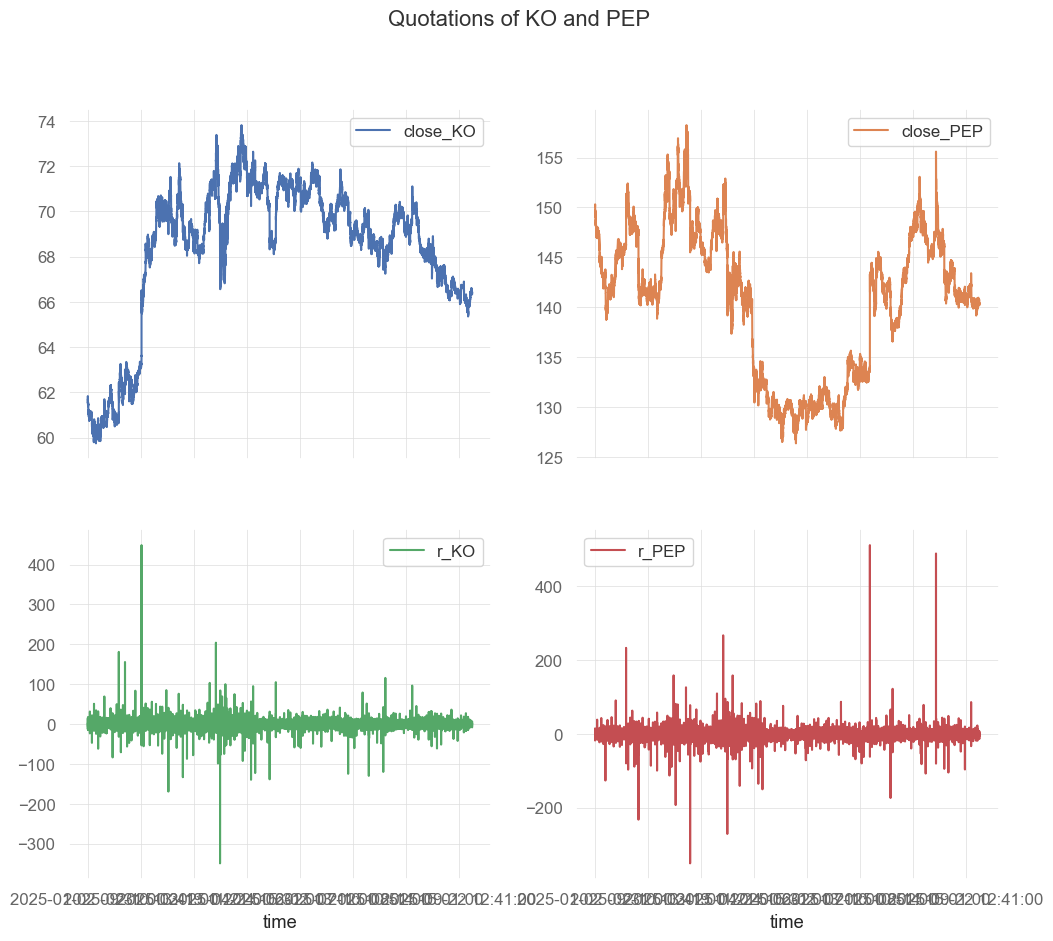

In [6]:
# lets see a figure of all columns
# with closing prices and returns for KO and PEP

# We don't want to treat time as a continuous variable in the graph
# (because there are "holes" from 4:00 PM to 9:30 AM the next day)

# Let's convert the datetime index to a text index and pass it as the x-axis
dataUSA_KO_PEP_plot = dataUSA_KO_PEP.copy()
dataUSA_KO_PEP_plot['time'] = dataUSA_KO_PEP_plot.index.astype(str)

# We reset the index to make 'time' a column
dataUSA_KO_PEP_plot = dataUSA_KO_PEP_plot.reset_index(drop = True)

# Let's set time as the X-axis and draw the graphs
dataUSA_KO_PEP_plot.plot(
    x = 'time',
    subplots = True,
    layout = (2, 2),
    title = "Quotations of KO and PEP",
    figsize = (12, 10)
)
plt.show()

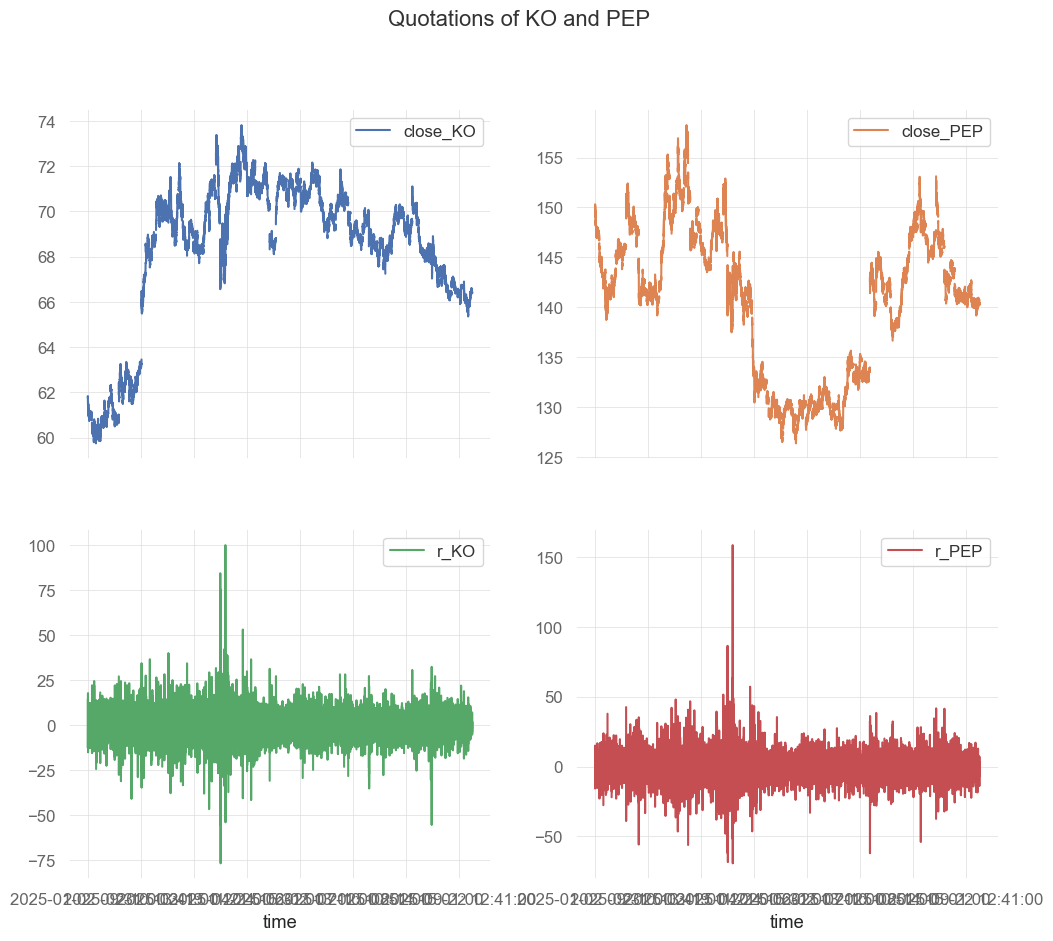

In [7]:
# initial assumptions about

# assumption 1
# we do not use the first 5 minutes of the session (9:31-9:35)
# and the last 5 minutes before the break (15:56-16:00) 
# let's insert missing data there

dataUSA_KO_PEP.loc[dataUSA_KO_PEP.between_time("9:31", "9:35").index] = np.nan
dataUSA_KO_PEP.loc[dataUSA_KO_PEP.between_time("15:56", "16:00").index] = np.nan

# and make the plots again

# Let's convert the datetime index to a text index and pass it as the x-axis
dataUSA_KO_PEP_plot = dataUSA_KO_PEP.copy()
dataUSA_KO_PEP_plot['time'] = dataUSA_KO_PEP_plot.index.astype(str)

# We reset the index to make 'time' a column
dataUSA_KO_PEP_plot = dataUSA_KO_PEP_plot.reset_index(drop = True)

# Let's set time as the X-axis and draw the graphs
dataUSA_KO_PEP_plot.plot(
    x = 'time',
    subplots = True,
    layout = (2, 2),
    title = "Quotations of KO and PEP",
    figsize = (12, 10)
)
plt.show()

# most of the outliers in returns disappeared

## Spread 1 based on prices

lets formulate a spread: `P1 - m * P2` (here `P_KO - m * P_PEP`)

where `m = m1/m2` is based on average ratio between the prices on the **PREVIOUS** day

Spread is a signal to our model, which shows whether to take position or not (volatility bands around the spread).

**CAUTION**! we assume the mean reverting behavior of the spread! 

We will calculate `m` based on **previous day's average prices**


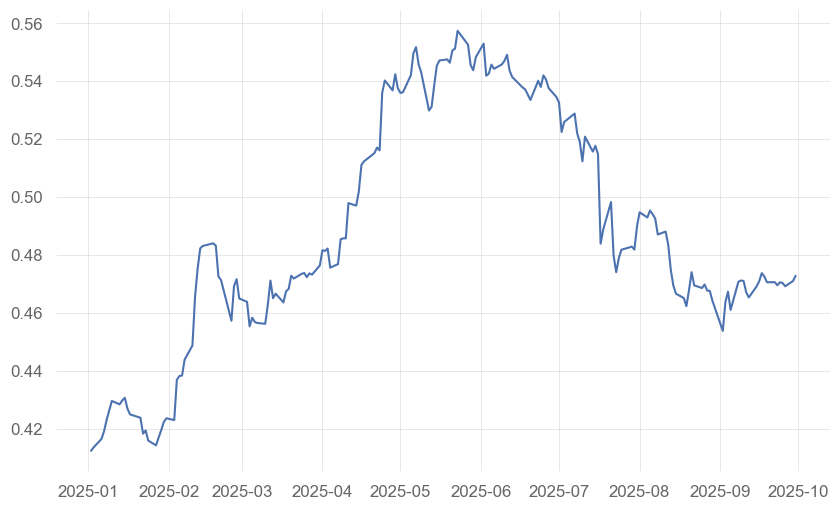

In [8]:
# lets calculate average ratio of prices on the daily basis

# Compute the ratio close_KO / close_PEP
ratio = dataUSA_KO_PEP["close_KO"] / dataUSA_KO_PEP["close_PEP"]

# Compute daily averages
US_av_ratio = ratio.resample("D").mean()
# keep non-missing values only
US_av_ratio = US_av_ratio.dropna()

# Assign the name
US_av_ratio = US_av_ratio.to_frame(name="av_ratio")

# Plot how the average ratio looks like
plt.plot(US_av_ratio.index, 
         US_av_ratio["av_ratio"])

# between 0.42 and 0.56


In [9]:
US_av_ratio.head()

,av_ratio
timestamp,
2025-01-02,0.412482
2025-01-03,0.413671
2025-01-06,0.416556
2025-01-07,0.419234
2025-01-08,0.423186


But calculations based on the first day will be used on the second day, etc.

Lets adjust the dataset accordingly by moving the time index to 9:30 of the next (trading) day.

In [10]:
# check first 10 dates
US_av_ratio.index[:10]

DatetimeIndex(['2025-01-02', '2025-01-03', '2025-01-06', '2025-01-07',
               '2025-01-08', '2025-01-10', '2025-01-13', '2025-01-14',
               '2025-01-15', '2025-01-16'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

In [11]:
# lets move it to 9:31 AM of the next day
US_av_ratio.index[:10] + pd.Timedelta("1D") + pd.Timedelta("9h31m")

DatetimeIndex(['2025-01-03 09:31:00', '2025-01-04 09:31:00',
               '2025-01-07 09:31:00', '2025-01-08 09:31:00',
               '2025-01-09 09:31:00', '2025-01-11 09:31:00',
               '2025-01-14 09:31:00', '2025-01-15 09:31:00',
               '2025-01-16 09:31:00', '2025-01-17 09:31:00'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

In [12]:
# but some of the dates might be Fridays and in this case
# we would move the index to 9:30 on Monday

# Lets check what days of the week are these original dates?

US_av_ratio.index[:10].day_name()

Index(['Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Friday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype='object', name='timestamp')

In [13]:
# lets use the above information to adjust the timestamps
US_av_ratio.index[:10] + pd.to_timedelta(np.where(US_av_ratio.index[:10].day_name() == "Friday", "3D", "1D")) + pd.Timedelta("9h31m")

# now it looks good

DatetimeIndex(['2025-01-03 09:31:00', '2025-01-06 09:31:00',
               '2025-01-07 09:31:00', '2025-01-08 09:31:00',
               '2025-01-09 09:31:00', '2025-01-13 09:31:00',
               '2025-01-14 09:31:00', '2025-01-15 09:31:00',
               '2025-01-16 09:31:00', '2025-01-17 09:31:00'],
              dtype='datetime64[ns]', freq=None)

In [14]:
# lets apply the changes in our data object
US_av_ratio.index = US_av_ratio.index + pd.to_timedelta(np.where(US_av_ratio.index.day_name() == "Friday", "3D", "1D")) + pd.Timedelta("9h31m")

US_av_ratio.head()

,av_ratio
2025-01-03 09:31:00,0.412482
2025-01-06 09:31:00,0.413671
2025-01-07 09:31:00,0.416556
2025-01-08 09:31:00,0.419234
2025-01-09 09:31:00,0.423186


## Spread 2 based on returns

alternative spread based on **RETURNS**:

`r1 - ms * r2` (here `r_KO - m * r_PEP`)

where `ms = s1/s2` is based on the ratio of **standard deviations** of returns on the **PREVIOUS** day

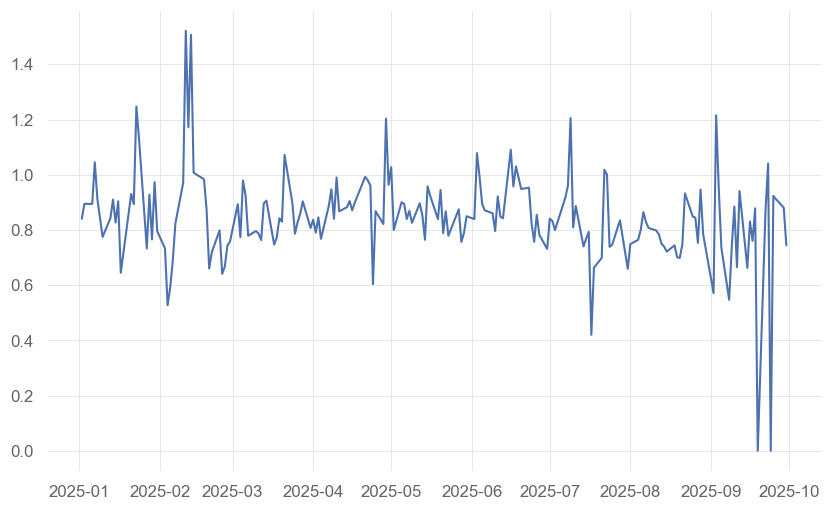

In [15]:
# Daily standard deviation ratio
US_sds_ratio = (
    dataUSA_KO_PEP
    .resample("D")
    .apply(lambda x: x["r_KO"].std() / x["r_PEP"].std())
    .to_frame(name = "sds_ratio")
)

# keep non-missing values only
US_sds_ratio = US_sds_ratio.dropna()

# see how it changes over time
plt.plot(US_sds_ratio.index, 
         US_sds_ratio["sds_ratio"])


In [16]:
# lets move the index to 9:31 of the next trading day

US_sds_ratio.index = US_sds_ratio.index + pd.to_timedelta(np.where(US_sds_ratio.index.day_name() == "Friday", "3D", "1D")) + pd.Timedelta("9h31m")

In [17]:
# we need to merge our basic 1 min data with daily calculations

dataUSA_2 = dataUSA_KO_PEP.copy()
dataUSA_2 = dataUSA_2.merge(US_av_ratio, 
                            # we want to use indexes 
                            # as merging keys
                            left_index = True, 
                            right_index = True, 
                            how = "left")
dataUSA_2 = dataUSA_2.merge(US_sds_ratio, 
                            left_index = True, 
                            right_index = True, 
                            how = "left")

# lets see how it worked

dataUSA_2.between_time("09:31", "09:40").head(30)

# there are a lot of missings in a the last 2 columns
# which should be filled with the last non-missing value
# (last multiplier is used until there is a new one)

,close_KO,close_PEP,r_KO,r_PEP,av_ratio,sds_ratio
timestamp,,,,,,
2025-01-02 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:32:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:33:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:34:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:35:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:36:00,61.7529,150.1457,14.374024,14.703199,NaN,NaN
2025-01-02 09:37:00,61.7480,150.0869,-0.793516,-3.916963,NaN,NaN
2025-01-02 09:38:00,61.8317,150.3124,13.545916,15.013353,NaN,NaN
2025-01-02 09:39:00,61.8219,150.1261,-1.585073,-12.401874,NaN,NaN


In [18]:
# We apply forward fill method to the last two columns
dataUSA_2[["av_ratio", "sds_ratio"]] = dataUSA_2[["av_ratio", "sds_ratio"]].ffill()

# and check the results
dataUSA_2.between_time("09:31", "09:40").head(30)

# now the values are filled properly

,close_KO,close_PEP,r_KO,r_PEP,av_ratio,sds_ratio
timestamp,,,,,,
2025-01-02 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:32:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:33:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:34:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:35:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:36:00,61.7529,150.1457,14.374024,14.703199,NaN,NaN
2025-01-02 09:37:00,61.7480,150.0869,-0.793516,-3.916963,NaN,NaN
2025-01-02 09:38:00,61.8317,150.3124,13.545916,15.013353,NaN,NaN
2025-01-02 09:39:00,61.8219,150.1261,-1.585073,-12.401874,NaN,NaN


In [19]:
# lets make sure that we exclude weekends from our data

dataUSA_2.index.day_name().value_counts()

# there are no weekends in the data

timestamp
Tuesday      15210
Wednesday    14820
Thursday     14430
Friday       14430
Monday       13650
Name: count, dtype: int64

In [20]:
# now we can calculate the spread (in 2 variants)
dataUSA_2["spread_avratio"] = dataUSA_2["close_KO"] - dataUSA_2["av_ratio"] * dataUSA_2["close_PEP"]
dataUSA_2["spread_sdsratio"] = dataUSA_2["r_KO"] - dataUSA_2["sds_ratio"] * dataUSA_2["r_PEP"]

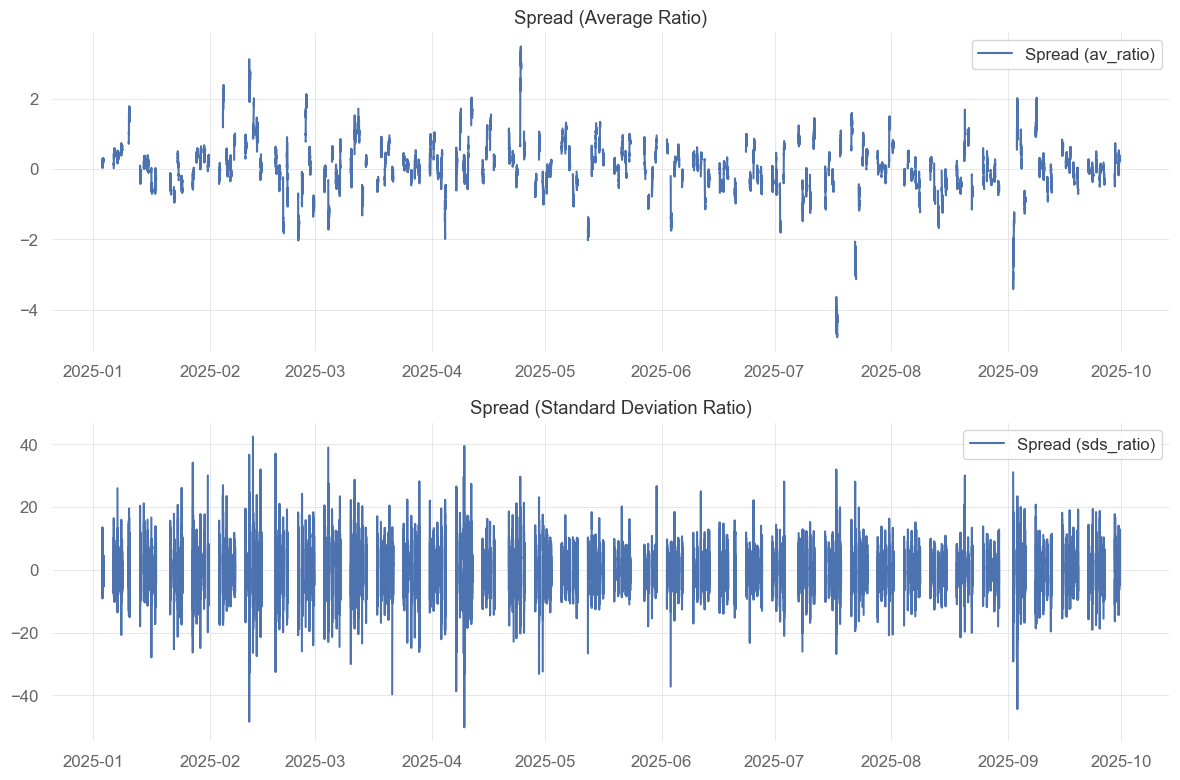

In [21]:
# plot both spreads in separate subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

axes[0].plot(dataUSA_2.index, 
             dataUSA_2["spread_avratio"], 
             label = "Spread (av_ratio)")
axes[0].set_title("Spread (Average Ratio)")
axes[0].legend()

axes[1].plot(dataUSA_2.index, 
             dataUSA_2["spread_sdsratio"], 
             label = "Spread (sds_ratio)")
axes[1].set_title("Spread (Standard Deviation Ratio)")
axes[1].legend()

plt.tight_layout()
plt.show()

In [22]:
# we assume that spread mean reverts to 0

# lets apply the volatility breakout model

# first we need to calculate the standard deviation of the spreads
# let's use rolling window of 120 minutes (2 hours)

dataUSA_2["std_spread_avratio"] = dataUSA_2["spread_avratio"].rolling(window=120).std()
dataUSA_2["std_spread_sdsratio"] = dataUSA_2["spread_sdsratio"].rolling(window=120).std()

# lets put missings whenever KO price is missing
# (PEP price should be missing in the same moments)

dataUSA_2.loc[dataUSA_2["close_KO"].isna(), ["std_spread_avratio", "std_spread_sdsratio"]] = np.nan


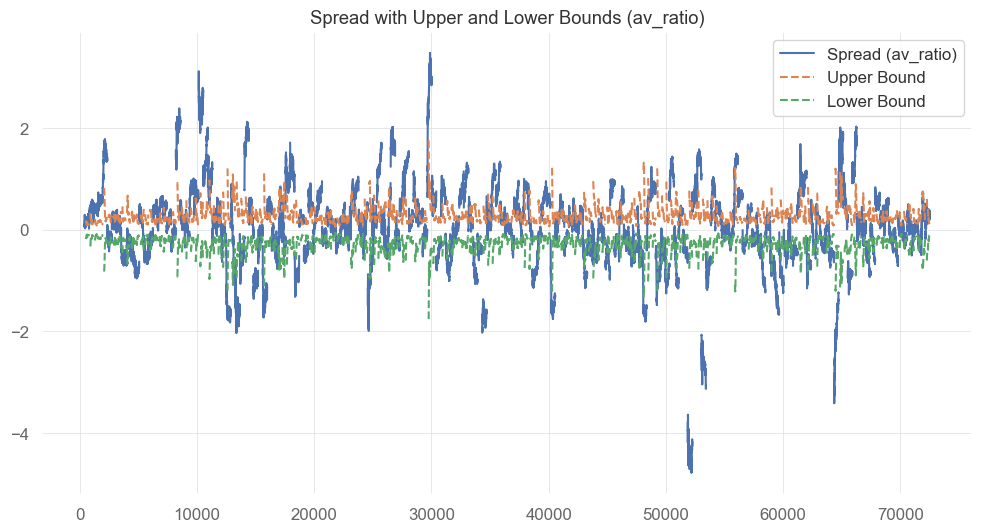

In [23]:
# applying a volatility breakout model
# sample upper and lower bounds for spreads
# for a volatility multiplier of 3
# (here we put the upper and lower band along zero)

dataUSA_2["upper_bound_avratio"] = 3 * dataUSA_2["std_spread_avratio"]
dataUSA_2["lower_bound_avratio"] = -3 * dataUSA_2["std_spread_avratio"]

# lets see how it looks like
# ignoring time dimension for clarity

dataUSA_2_plot = dataUSA_2.reset_index()
plt.figure(figsize=(12, 6))
plt.plot(dataUSA_2_plot.index, 
         dataUSA_2_plot["spread_avratio"], 
         label="Spread (av_ratio)")
plt.plot(dataUSA_2_plot.index, 
         dataUSA_2_plot["upper_bound_avratio"], 
         label="Upper Bound", linestyle='--')
plt.plot(dataUSA_2_plot.index, 
         dataUSA_2_plot["lower_bound_avratio"], 
         label="Lower Bound", linestyle='--')
plt.title("Spread with Upper and Lower Bounds (av_ratio)")
plt.legend()
plt.show()  

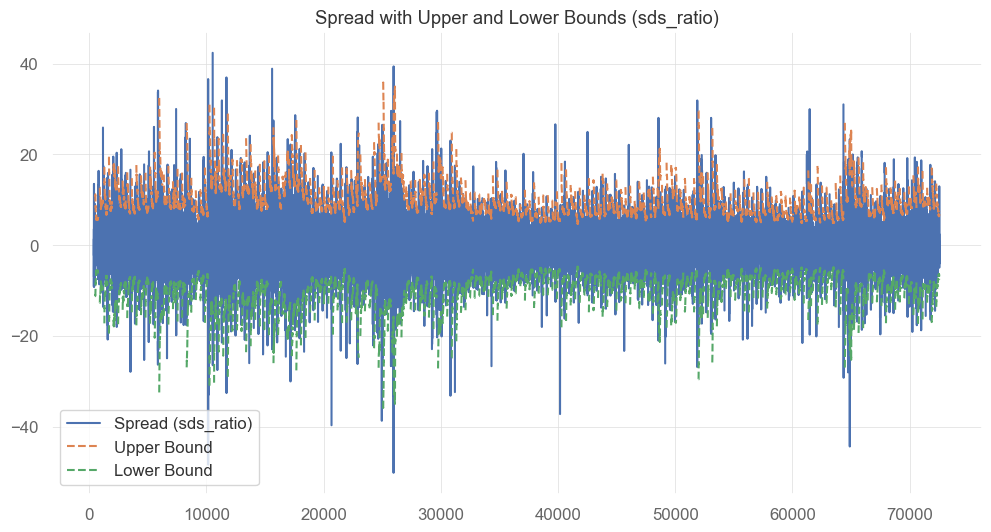

In [24]:
# the same for spread_sdsratio

dataUSA_2["upper_bound_sdsratio"] = 3 * dataUSA_2["std_spread_sdsratio"]
dataUSA_2["lower_bound_sdsratio"] = -3 * dataUSA_2["std_spread_sdsratio"]

# lets see how it looks like
# ignoring time dimension for clarity
dataUSA_2_plot = dataUSA_2.reset_index()
plt.figure(figsize=(12, 6))
plt.plot(dataUSA_2_plot.index, 
         dataUSA_2_plot["spread_sdsratio"], 
         label="Spread (sds_ratio)")
plt.plot(dataUSA_2_plot.index, 
         dataUSA_2_plot["upper_bound_sdsratio"],
         label="Upper Bound", linestyle='--')
plt.plot(dataUSA_2_plot.index, 
         dataUSA_2_plot["lower_bound_sdsratio"],
         label="Lower Bound", linestyle='--')
plt.title("Spread with Upper and Lower Bounds (sds_ratio)")
plt.legend()
plt.show()

In [25]:
### position will be based on relation of the spread to volatility bands

# lets assume we do not trade within the first 15-mins of the day
# and exit all positions 15 minutes before the end of quotations

# lets create a pos_flat vector and fill it with 0s

pos_flat = np.zeros(len(dataUSA_2))

In [26]:
# we do not trade within the first quarter (9:31-9:45) 
# but also before that time since midnight

pos_flat[dataUSA_2.index.time <= pd.to_datetime("9:45").time()] = 1

# and last quarter of the session (15:46-16:00)
# but also after this time until midnight

pos_flat[dataUSA_2.index.time >= pd.to_datetime("15:46").time()] = 1

# !!! there are no weekends in our data, so we do not need 
# to control for that in pos_flat

pd.Series(pos_flat).value_counts()

0.0    66960
1.0     5580
Name: count, dtype: int64

In [27]:
# lets use the positionVB() function known from previous labs
# to calculate the position based on spread_avratio

from functions.position_VB import positionVB

dataUSA_2["pos_avratio"] = positionVB(signal = dataUSA_2["spread_avratio"],
                                      lower = dataUSA_2["lower_bound_avratio"],
                                      upper = dataUSA_2["upper_bound_avratio"],
                                      pos_flat = pos_flat,
                                      # IMPORTANT !!!!
                                      strategy = "mr")

dataUSA_2["pos_avratio"].value_counts()

pos_avratio
 0.0    33544
-1.0    21403
 1.0    17593
Name: count, dtype: int64

In [28]:
# lets create a vector of the number of transactions

dataUSA_2["n_trans_avratio"] = np.abs(np.diff(dataUSA_2["pos_avratio"], prepend = 0))

In [29]:
# next we calculate the gross P&L from the strategy
# for every minute 
# we multiply the position by the return of the spread

# gross PnL = position * (dP_KO - ratio * dP_PEP) 

dataUSA_2["pnl_gross_avratio"] = dataUSA_2["pos_avratio"] * (dataUSA_2["close_KO"].diff() - dataUSA_2["av_ratio"] * dataUSA_2["close_PEP"].diff())

In [30]:
# Lets assume the trading cost on the level of 5 bpts (0.05%) per transaction

# check its value based on average closing prices
# during the analysed period

trcost_KO = round(dataUSA_close["close_KO"].mean() * 0.0005, 2)
trcost_PEP = round(dataUSA_close["close_PEP"].mean() * 0.0005, 2)

print(f"Trading cost per transaction for KO: {trcost_KO:.2f} USD")
print(f"Trading cost per transaction for PEP: {trcost_PEP:.2f} USD")

Trading cost per transaction for KO: 0.03 USD
Trading cost per transaction for PEP: 0.07 USD


In [31]:
# pnl after  costs

# !!! REMEMBER that we trade one unit of KO and av_ratio units of PEP
# AND there is NO minus "-" in the costs - they are always positive !!!

dataUSA_2["pnl_net_avratio"] = dataUSA_2["pnl_gross_avratio"] - dataUSA_2["n_trans_avratio"] * (trcost_KO + dataUSA_2["av_ratio"] * trcost_PEP)

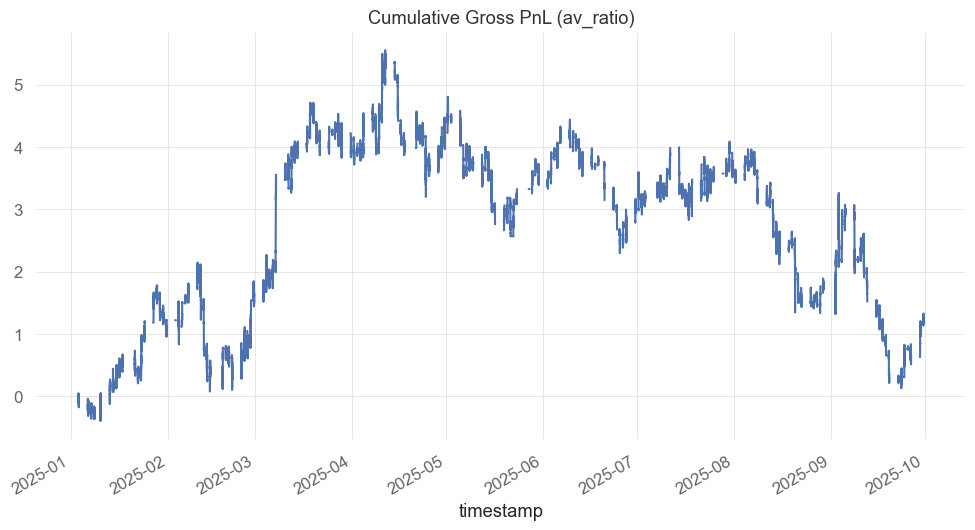

In [32]:
# lets calculate and plot cumulative gross PnL
# without adding a new column to the data

dataUSA_2["pnl_gross_avratio"].cumsum().plot(figsize=(12,6), 
                                             title="Cumulative Gross PnL (av_ratio)")
plt.show()

# positive, but not very impressive...

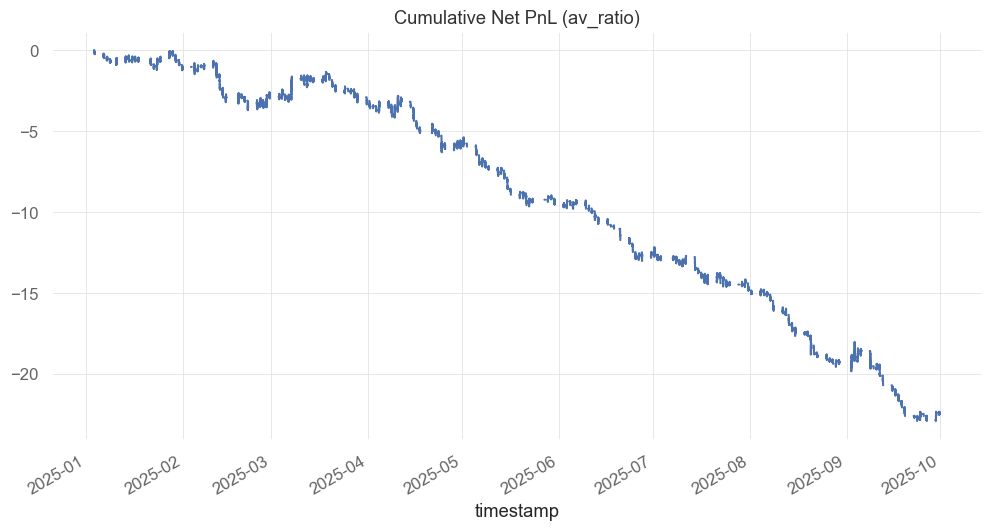

In [33]:
# what about cummulative net PnL?

dataUSA_2["pnl_net_avratio"].cumsum().plot(figsize=(12,6), 
                                           title="Cumulative Net PnL (av_ratio)")
plt.show()

# as expected :)

In [34]:
# lets do a comparison within a loop for spread_avratio and spread_sdsratio

def mySR(x, scale):
    return np.sqrt(scale) * np.nanmean(x) / np.nanstd(x)

volat_sd_parameters = [60, 90, 120, 150, 180]
m_parameters = [0.5, 1, 1.5, 2, 2.5, 3, 3.5]

# create a dataframe to store results
summary_all_KO_PEP = pd.DataFrame()

for volat_sd in volat_sd_parameters:
    for m in m_parameters:
        print(f"volat_sd: {volat_sd}, m: {m}")

        # calculate teh elements of the strategy
        close_KO = dataUSA_2["close_KO"]
        close_PEP = dataUSA_2["close_PEP"]

        # spread based on average ratio
        signal_avratio = close_KO - (dataUSA_2["av_ratio"] * close_PEP)
        std_spread_avratio = signal_avratio.rolling(window=volat_sd).std()
        upper_bound_avratio = m * std_spread_avratio
        lower_bound_avratio = -m * std_spread_avratio
        # position
        pos_avratio = positionVB(signal = signal_avratio,
                                lower = lower_bound_avratio,
                                upper = upper_bound_avratio,
                                pos_flat = pos_flat,
                                strategy = "mr")
        # number of transactions
        n_trans_avratio = np.abs(np.diff(pos_avratio, prepend = 0))
        # convert to pd.Series and set the index
        n_trans_avratio = pd.Series(n_trans_avratio, index=dataUSA_2.index)

        # gross and net PnL
        pnl_gross_avratio = pos_avratio * (dataUSA_2["close_KO"].diff() - dataUSA_2["av_ratio"] * dataUSA_2["close_PEP"].diff())
        pnl_net_avratio = pnl_gross_avratio - n_trans_avratio * (trcost_KO + dataUSA_2["av_ratio"] * trcost_PEP)

        # spread based on standard deviation ratio
        signal_sdsratio = dataUSA_2["spread_sdsratio"]
        std_spread_sdsratio = signal_sdsratio.rolling(window=volat_sd).std()
        upper_bound_sdsratio = m * std_spread_sdsratio
        lower_bound_sdsratio = -m * std_spread_sdsratio
        # position
        pos_sdsratio = positionVB(signal = signal_sdsratio,
                                lower = lower_bound_sdsratio,
                                upper = upper_bound_sdsratio,
                                pos_flat = pos_flat,
                                strategy = "mr")
        
        # number of transactions
        n_trans_sdsratio = np.abs(np.diff(pos_sdsratio, prepend = 0))
        # convert to pd.Series and set the index
        n_trans_sdsratio = pd.Series(n_trans_sdsratio, index=dataUSA_2.index)

        # !!!!! signal is based on returns, but PnL on prices !!!!
        pnl_gross_sdsratio = pos_sdsratio * (dataUSA_2["close_KO"].diff() - dataUSA_2["sds_ratio"] * dataUSA_2["close_PEP"].diff())
        pnl_net_sdsratio = pnl_gross_sdsratio - n_trans_sdsratio * (trcost_KO + dataUSA_2["sds_ratio"] * trcost_PEP)

        # aggregate to daily
        pnl_gross_avratio_daily = pnl_gross_avratio.resample("D").sum().dropna()
        pnl_gross_sdsratio_daily = pnl_gross_sdsratio.resample("D").sum().dropna()
        pnl_net_avratio_daily = pnl_net_avratio.resample("D").sum().dropna()
        pnl_net_sdsratio_daily = pnl_net_sdsratio.resample("D").sum().dropna()
        n_trans_avratio_daily = n_trans_avratio.resample("D").sum().dropna()
        n_trans_sdsratio_daily = n_trans_sdsratio.resample("D").sum().dropna()

        # calculate summary measures
        gross_SR_avratio = mySR(pnl_gross_avratio_daily, scale = 252)
        net_SR_avratio = mySR(pnl_net_avratio_daily, scale = 252)
        gross_PnL_avratio = pnl_gross_avratio_daily.sum()
        net_PnL_avratio = pnl_net_avratio_daily.sum()
        av_daily_ntrans_avratio = n_trans_avratio_daily.mean()
        
        gross_SR_sdsratio = mySR(pnl_gross_sdsratio_daily, scale = 252)
        net_SR_sdsratio = mySR(pnl_net_sdsratio_daily, scale = 252)
        gross_PnL_sdsratio = pnl_gross_sdsratio_daily.sum()
        net_PnL_sdsratio = pnl_net_sdsratio_daily.sum()
        av_daily_ntrans_sdsratio = n_trans_sdsratio_daily.mean()
        
        # Collect the necessary results into one object
        summary = pd.DataFrame({
                'volat_sd': volat_sd,
                'm': m,
                'period': '2025Q1-Q3',
                'gross_SR_avratio': gross_SR_avratio,
                'net_SR_avratio': net_SR_avratio,
                'gross_PnL_avratio': gross_PnL_avratio,
                'net_PnL_avratio': net_PnL_avratio,
                'av_daily_ntrans_avratio': av_daily_ntrans_avratio,
                'gross_SR_sdsratio': gross_SR_sdsratio,
                'net_SR_sdsratio': net_SR_sdsratio,
                'gross_PnL_sdsratio': gross_PnL_sdsratio,
                'net_PnL_sdsratio': net_PnL_sdsratio,
                'av_daily_ntrans_sdsratio': av_daily_ntrans_sdsratio
                }, index=[0])

        # Append the results to the summary
        summary_all_KO_PEP = pd.concat([summary_all_KO_PEP, 
                                        summary], 
                                    ignore_index = True)

# it takes about 3 minutes to run

volat_sd: 60, m: 0.5
volat_sd: 60, m: 1
volat_sd: 60, m: 1.5
volat_sd: 60, m: 2
volat_sd: 60, m: 2.5
volat_sd: 60, m: 3
volat_sd: 60, m: 3.5
volat_sd: 90, m: 0.5
volat_sd: 90, m: 1
volat_sd: 90, m: 1.5
volat_sd: 90, m: 2
volat_sd: 90, m: 2.5
volat_sd: 90, m: 3
volat_sd: 90, m: 3.5
volat_sd: 120, m: 0.5
volat_sd: 120, m: 1
volat_sd: 120, m: 1.5
volat_sd: 120, m: 2
volat_sd: 120, m: 2.5
volat_sd: 120, m: 3
volat_sd: 120, m: 3.5
volat_sd: 150, m: 0.5
volat_sd: 150, m: 1
volat_sd: 150, m: 1.5
volat_sd: 150, m: 2
volat_sd: 150, m: 2.5
volat_sd: 150, m: 3
volat_sd: 150, m: 3.5
volat_sd: 180, m: 0.5
volat_sd: 180, m: 1
volat_sd: 180, m: 1.5
volat_sd: 180, m: 2
volat_sd: 180, m: 2.5
volat_sd: 180, m: 3
volat_sd: 180, m: 3.5


In [35]:
# lets import a function written by the lecturer
# to visualize the strategy results in a form of a heatmap
from functions.plot_heatmap import plot_heatmap

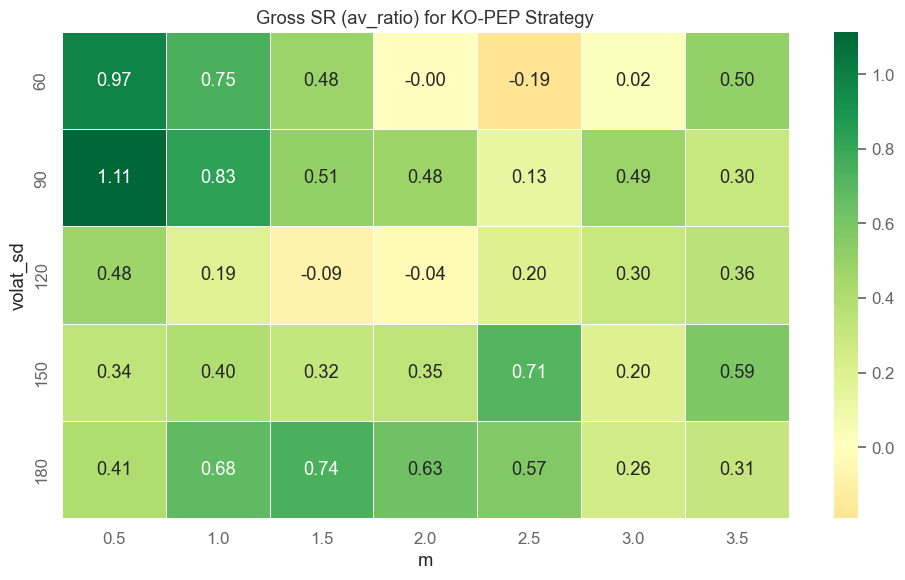

In [36]:
# and see the results on the heatmap graph

# gross SR - spread av_ratio
plot_heatmap(summary_all_KO_PEP, 
             value_col = "gross_SR_avratio", 
             index_col = "volat_sd", 
             columns_col = "m", 
             title = "Gross SR (av_ratio) for KO-PEP Strategy")

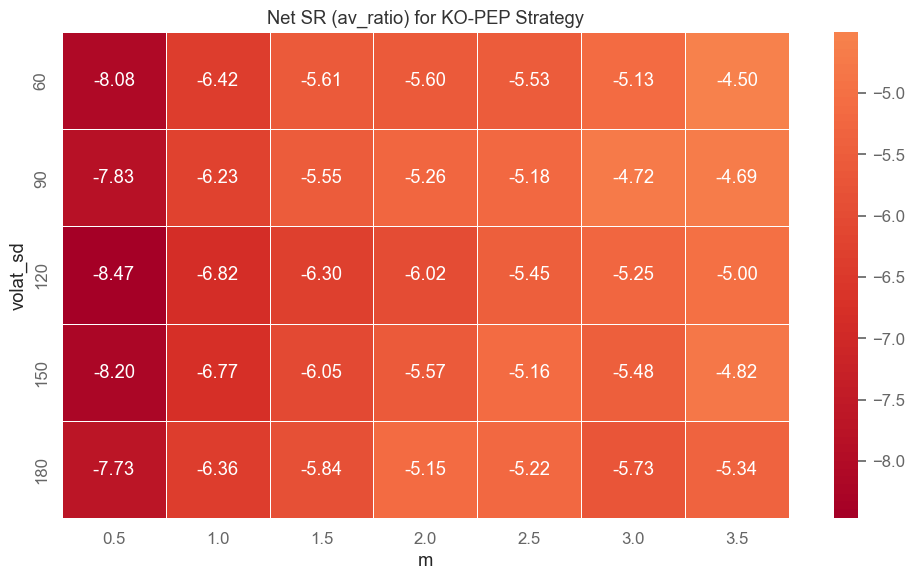

In [37]:
# net SR - spread av_ratio
plot_heatmap(summary_all_KO_PEP,
             value_col = "net_SR_avratio", 
             index_col = "volat_sd", 
             columns_col = "m", 
             title = "Net SR (av_ratio) for KO-PEP Strategy")

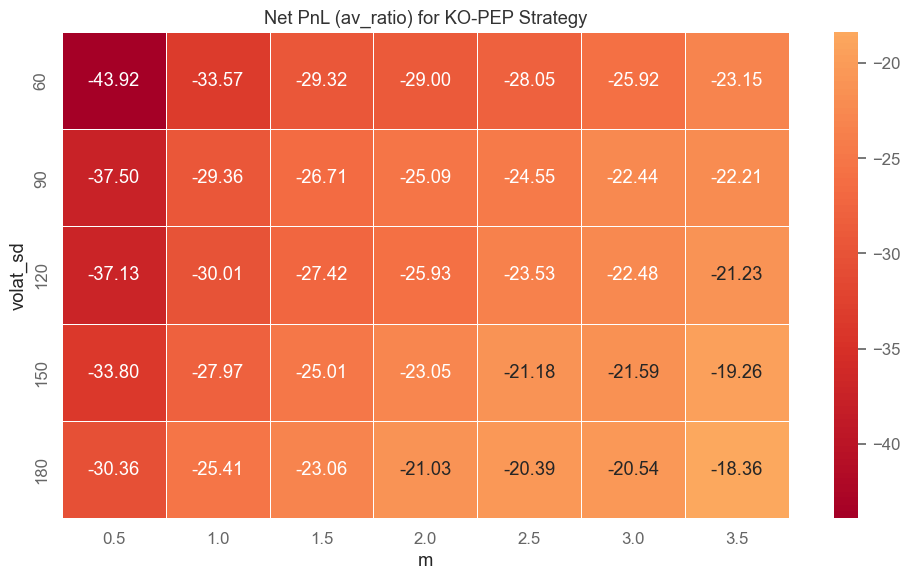

In [38]:
# net Pnl - spread av_ratio
plot_heatmap(summary_all_KO_PEP,
             value_col = "net_PnL_avratio", 
             index_col = "volat_sd", 
             columns_col = "m", 
             title = "Net PnL (av_ratio) for KO-PEP Strategy")

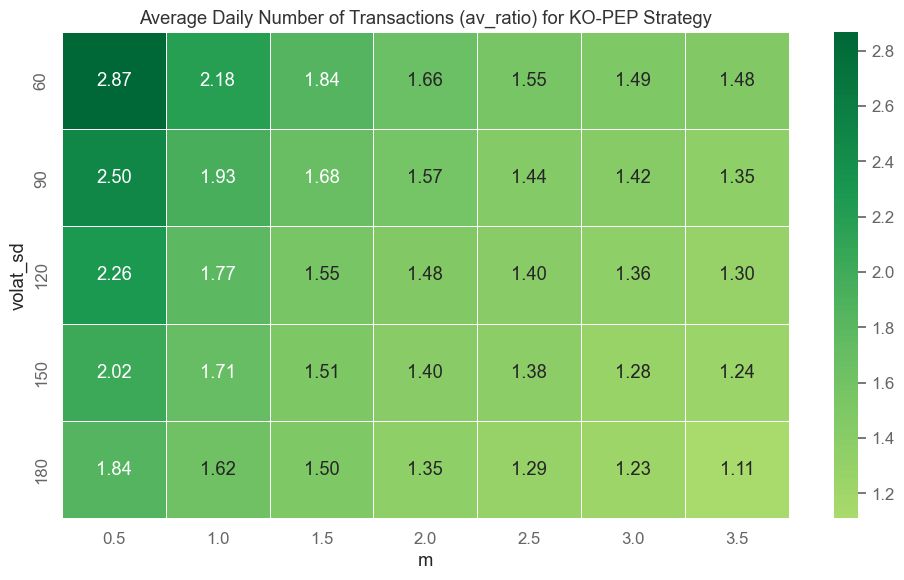

In [39]:
# average daily ntrans

plot_heatmap(summary_all_KO_PEP,
             value_col = "av_daily_ntrans_avratio",
             index_col = "volat_sd",
             columns_col = "m",
             title = "Average Daily Number of Transactions (av_ratio) for KO-PEP Strategy")

In [40]:
# here we assume that we trade every day

# lets save the results for the next labs, when we will
# apply some additional filtering rules

dataUSA_2.to_parquet("dataUSA_2_KO_PEP.parquet")
summary_all_KO_PEP.to_parquet("summary_all_KO_PEP.parquet")


# Exercises 8

# Exercise 8.1

* using `plot_heatmap()` function check profitability of strategies using spread_sdsratio
* for the best combination of parameters (in terms of net SR) prepare and plot the equity curve (gross and net cummulatve pnl)

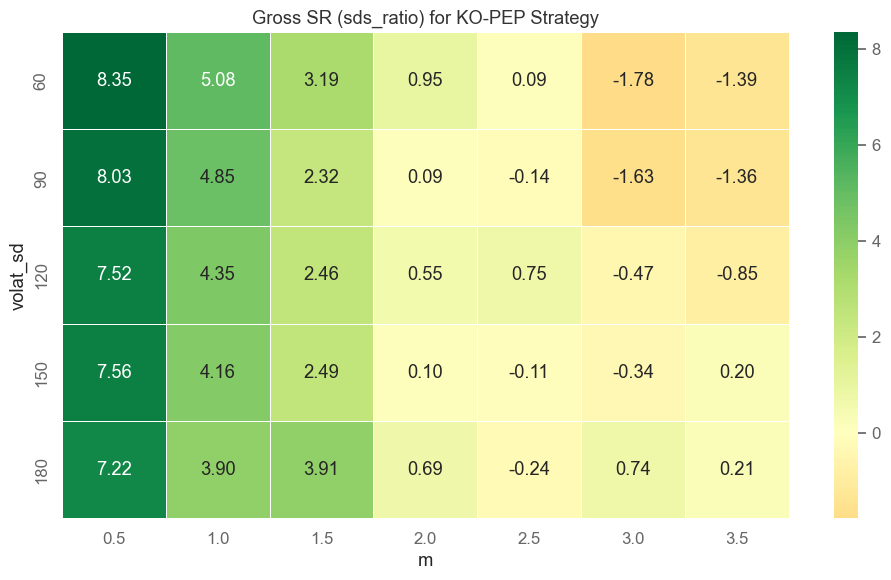

In [41]:
plot_heatmap(summary_all_KO_PEP, 
             value_col = "gross_SR_sdsratio", 
             index_col = "volat_sd", 
             columns_col = "m", 
             title = "Gross SR (sds_ratio) for KO-PEP Strategy")

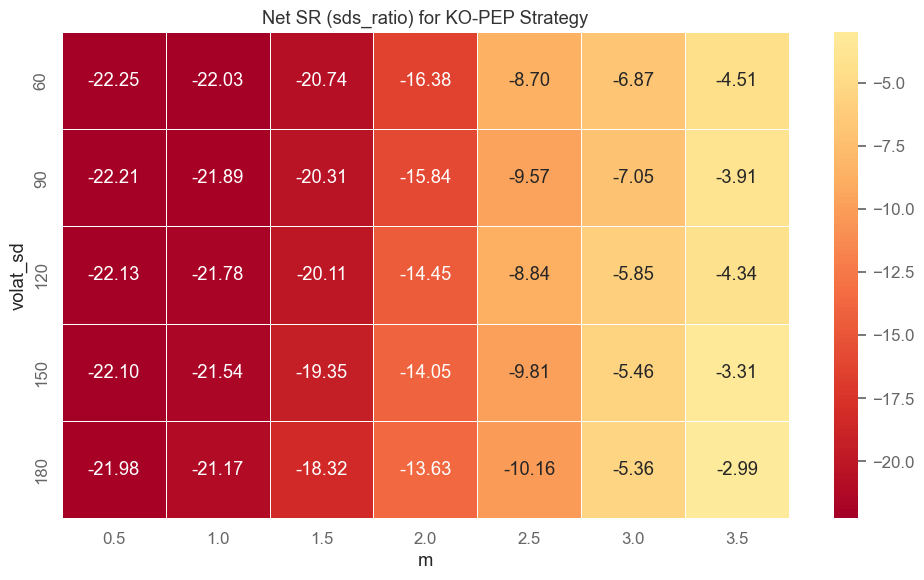

In [42]:
plot_heatmap(summary_all_KO_PEP,
             value_col = "net_SR_sdsratio", 
             index_col = "volat_sd", 
             columns_col = "m", 
             title = "Net SR (sds_ratio) for KO-PEP Strategy")

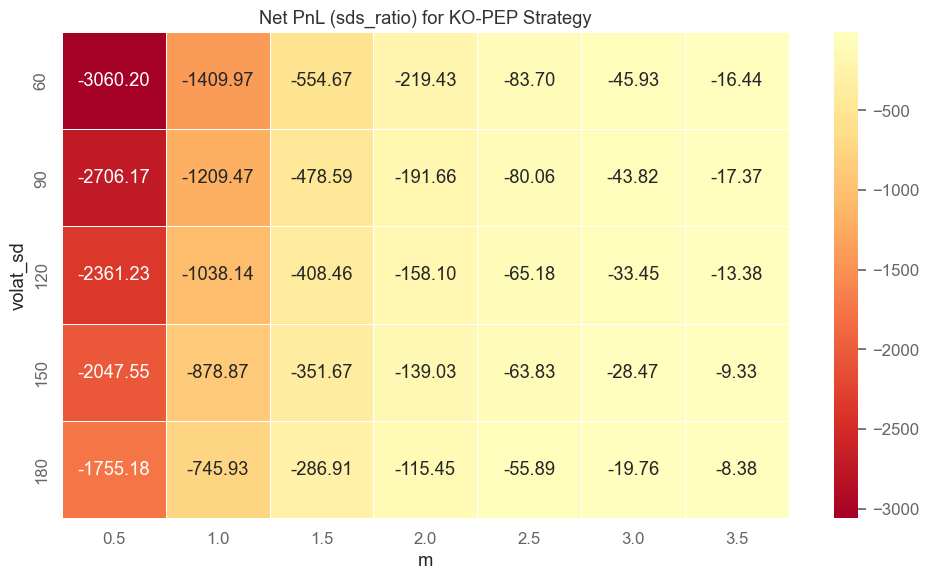

In [43]:
plot_heatmap(summary_all_KO_PEP,
             value_col = "net_PnL_sdsratio", 
             index_col = "volat_sd", 
             columns_col = "m", 
             title = "Net PnL (sds_ratio) for KO-PEP Strategy")

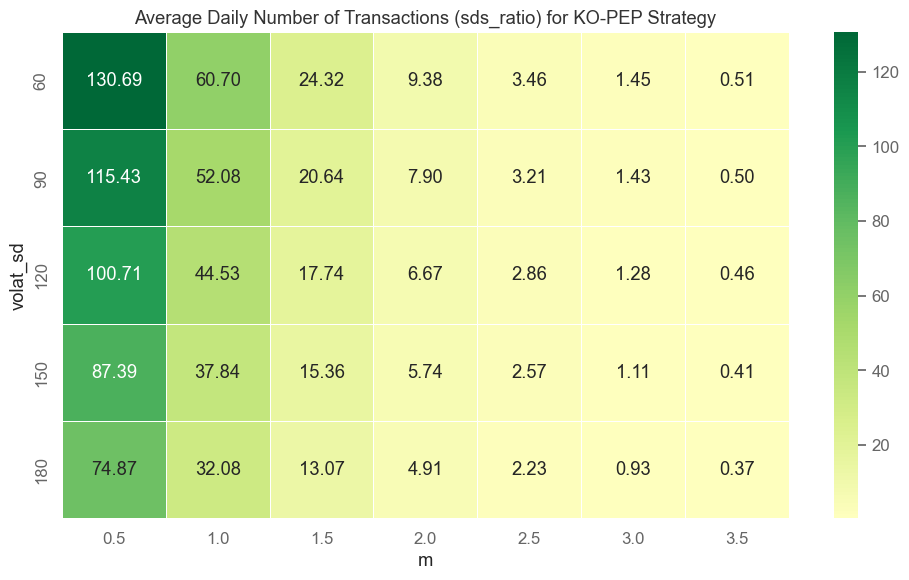

In [44]:
plot_heatmap(summary_all_KO_PEP,
             value_col = "av_daily_ntrans_sdsratio",
             index_col = "volat_sd",
             columns_col = "m",
             title = "Average Daily Number of Transactions (sds_ratio) for KO-PEP Strategy")

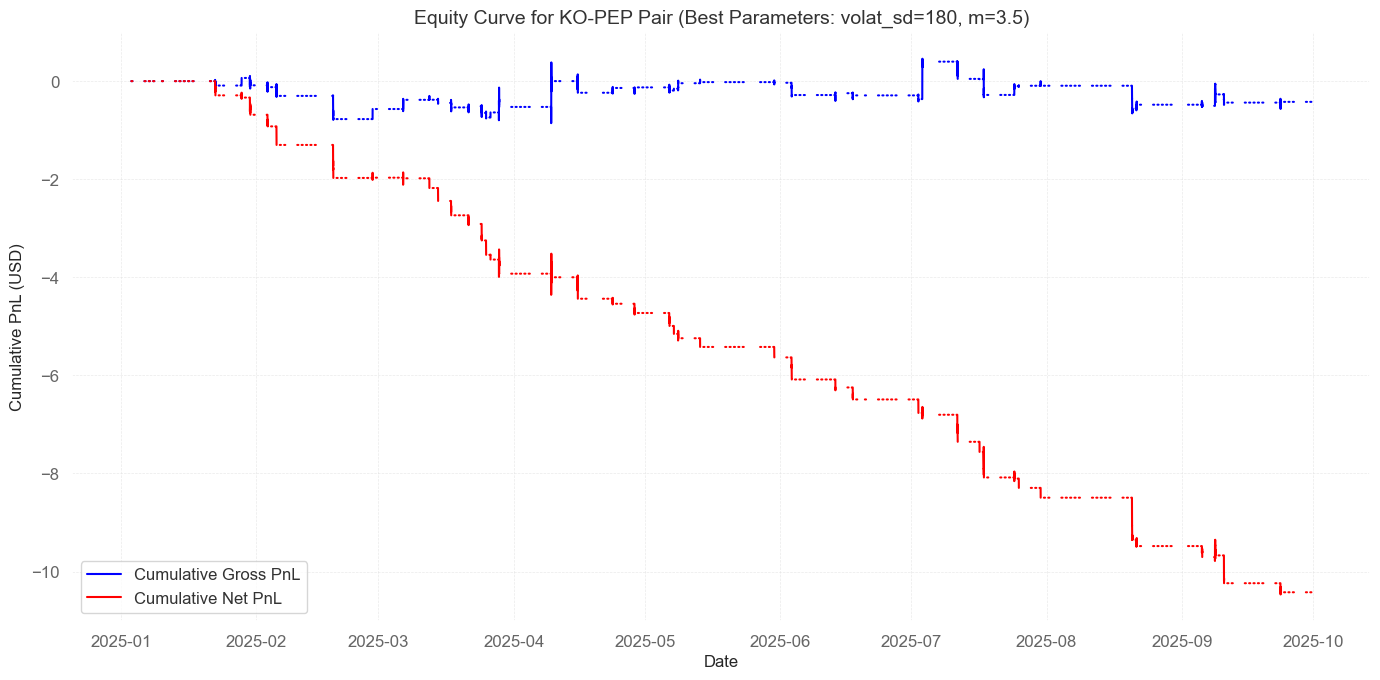

In [46]:
best_volat_sd = 180
best_m = 3.5

signal_sdsratio = dataUSA_2["spread_sdsratio"]
std_spread_sdsratio = signal_sdsratio.rolling(window=best_volat_sd).std()
upper_bound_sdsratio = best_m * std_spread_sdsratio
lower_bound_sdsratio = -best_m * std_spread_sdsratio

pos_sdsratio = positionVB(
    signal=signal_sdsratio,
    lower=lower_bound_sdsratio,
    upper=upper_bound_sdsratio,
    pos_flat=pos_flat,
    strategy="mr"
)

n_trans_sdsratio = np.abs(np.diff(pos_sdsratio, prepend=0))
n_trans_sdsratio = pd.Series(n_trans_sdsratio, index=dataUSA_2.index)

pnl_gross_sdsratio = pos_sdsratio * (dataUSA_2["close_KO"].diff() - dataUSA_2["av_ratio"] * dataUSA_2["close_PEP"].diff())

trcost_KO = 0.03  
trcost_PEP = 0.07
pnl_net_sdsratio = pnl_gross_sdsratio - n_trans_sdsratio * (trcost_KO + trcost_PEP)

cum_pnl_gross = pnl_gross_sdsratio.cumsum()
cum_pnl_net = pnl_net_sdsratio.cumsum()

plt.figure(figsize=(14, 7))

plt.plot(cum_pnl_gross.index, cum_pnl_gross, label='Cumulative Gross PnL', color='blue', linewidth=1.5)

plt.plot(cum_pnl_net.index, cum_pnl_net, label='Cumulative Net PnL', color='red', linewidth=1.5)

plt.title('Equity Curve for KO-PEP Pair (Best Parameters: volat_sd=180, m=3.5)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative PnL (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Exercise 8.2

build and test a similar model for another pair of stocks (play with different parameter values and spread definition) - assume costs at the level of 5 bps


In [47]:
dataUSA_MA_V = pd.concat(
    [dataUSA_close[['close_MA', 'close_V']], 
     dataUSA_r[['r_MA', 'r_V']]],
    axis=1
)

dataUSA_MA_V.head()

,close_MA,close_V,r_MA,r_V
timestamp,,,,
2025-01-02 09:31:00,524.7426,316.8013,NaN,NaN
2025-01-02 09:32:00,523.6538,316.4724,-20.770777,-10.387295
2025-01-02 09:33:00,524.1012,316.1336,8.540165,-10.711249
2025-01-02 09:34:00,523.8328,315.9542,-5.122460,-5.676427
2025-01-02 09:35:00,523.8974,316.5821,1.233142,19.853413


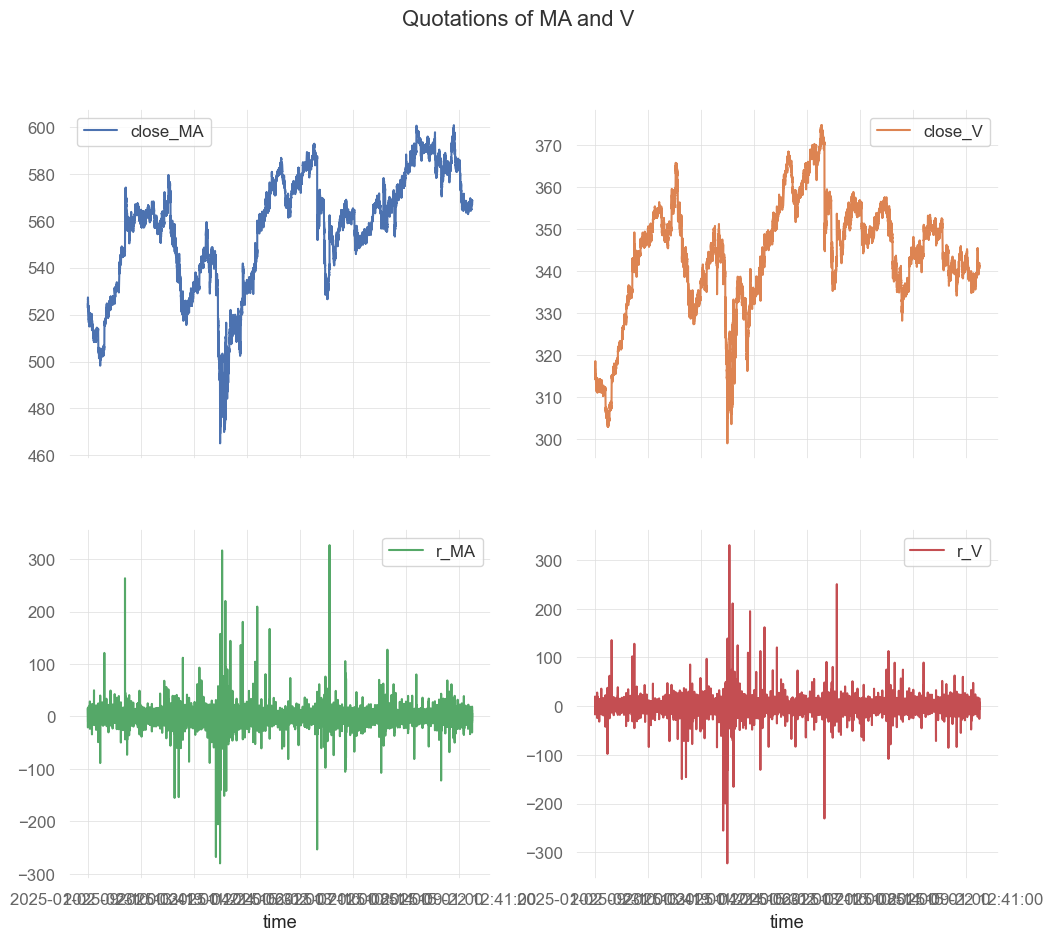

In [48]:
# lets see a figure of all columns
# with closing prices and returns for KO and PEP

# We don't want to treat time as a continuous variable in the graph
# (because there are "holes" from 4:00 PM to 9:30 AM the next day)

# Let's convert the datetime index to a text index and pass it as the x-axis
dataUSA_MA_V_plot = dataUSA_MA_V.copy()
dataUSA_MA_V_plot['time'] = dataUSA_MA_V_plot.index.astype(str)

# We reset the index to make 'time' a column
dataUSA_MA_V_plot = dataUSA_MA_V_plot.reset_index(drop = True)

# Let's set time as the X-axis and draw the graphs
dataUSA_MA_V_plot.plot(
    x = 'time',
    subplots = True,
    layout = (2, 2),
    title = "Quotations of MA and V",
    figsize = (12, 10)
)
plt.show()

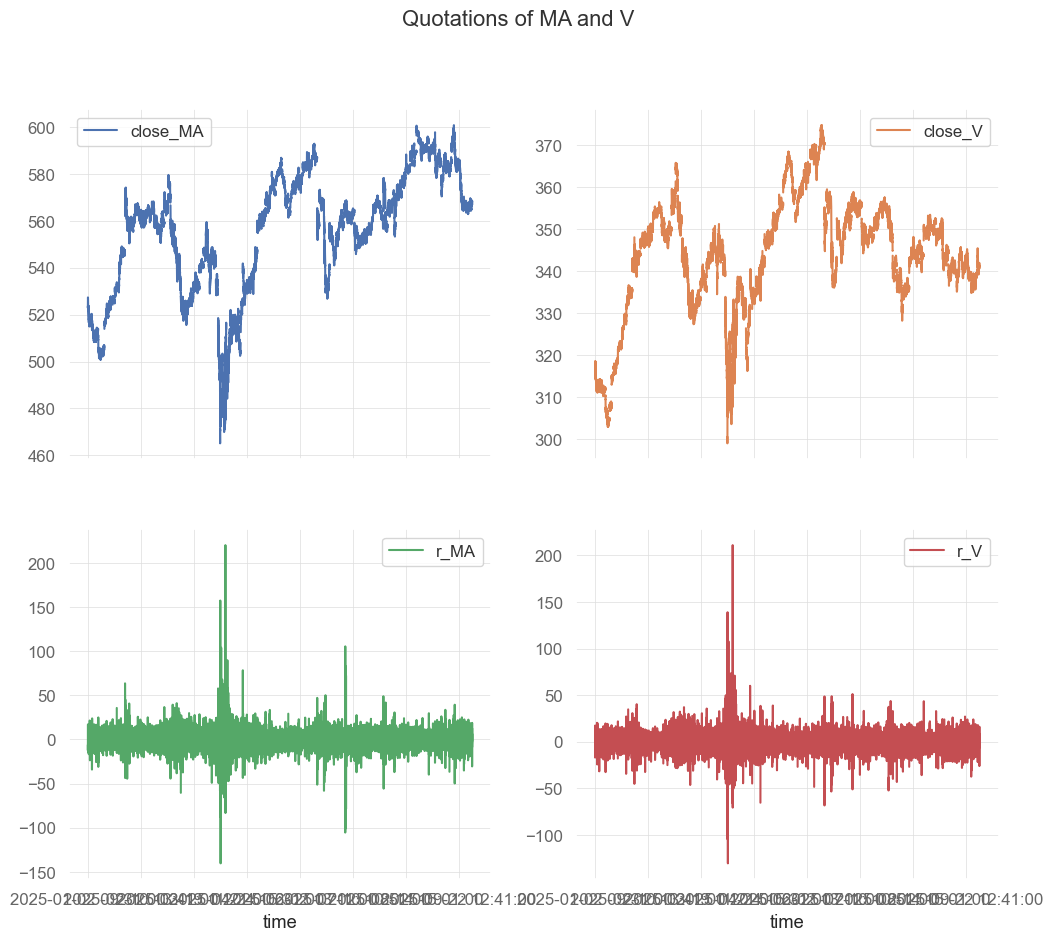

In [49]:
# initial assumptions about

# assumption 1
# we do not use the first 5 minutes of the session (9:31-9:35)
# and the last 5 minutes before the break (15:56-16:00) 
# let's insert missing data there

dataUSA_MA_V.loc[dataUSA_MA_V.between_time("9:31", "9:35").index] = np.nan
dataUSA_MA_V.loc[dataUSA_MA_V.between_time("15:56", "16:00").index] = np.nan

# and make the plots again

# Let's convert the datetime index to a text index and pass it as the x-axis
dataUSA_MA_V_plot = dataUSA_MA_V.copy()
dataUSA_MA_V_plot['time'] = dataUSA_MA_V_plot.index.astype(str)

# We reset the index to make 'time' a column
dataUSA_MA_V_plot = dataUSA_MA_V_plot.reset_index(drop = True)

# Let's set time as the X-axis and draw the graphs
dataUSA_MA_V_plot.plot(
    x = 'time',
    subplots = True,
    layout = (2, 2),
    title = "Quotations of MA and V",
    figsize = (12, 10)
)
plt.show()

# most of the outliers in returns disappeared

# Spread 1

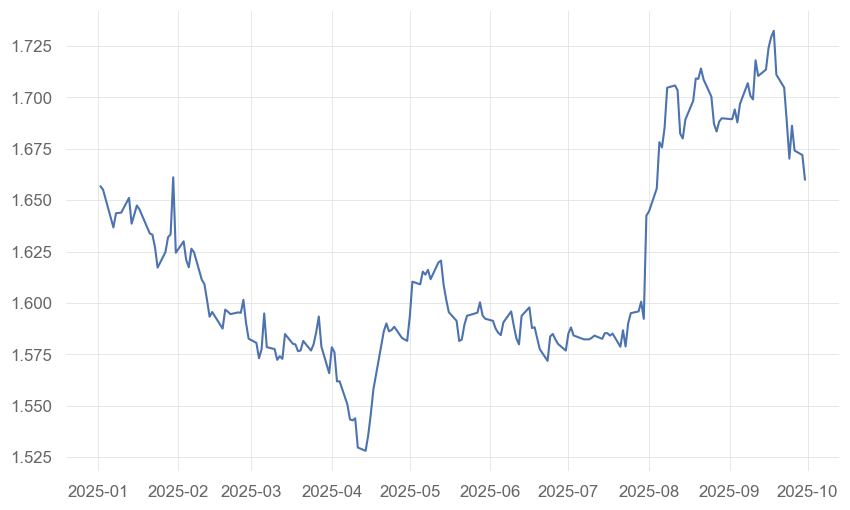

In [50]:
# lets calculate average ratio of prices on the daily basis

# Compute the ratio close_KO / close_PEP
ratio = dataUSA_MA_V["close_MA"] / dataUSA_MA_V["close_V"]

# Compute daily averages
US_av_ratio_MV = ratio.resample("D").mean()
# keep non-missing values only
US_av_ratio_MV = US_av_ratio_MV.dropna()

# Assign the name
US_av_ratio_MV = US_av_ratio_MV.to_frame(name="av_ratio_mv")

# Plot how the average ratio looks like
plt.plot(US_av_ratio_MV.index, 
         US_av_ratio_MV["av_ratio_mv"])



In [51]:
US_av_ratio_MV.head()

,av_ratio_mv
timestamp,
2025-01-02,1.656787
2025-01-03,1.655130
2025-01-06,1.641362
2025-01-07,1.636734
2025-01-08,1.643628


In [52]:
US_av_ratio_MV.index[:10]

DatetimeIndex(['2025-01-02', '2025-01-03', '2025-01-06', '2025-01-07',
               '2025-01-08', '2025-01-10', '2025-01-13', '2025-01-14',
               '2025-01-15', '2025-01-16'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

In [53]:
US_av_ratio_MV.index[:10] + pd.Timedelta("1D") + pd.Timedelta("9h31m")

DatetimeIndex(['2025-01-03 09:31:00', '2025-01-04 09:31:00',
               '2025-01-07 09:31:00', '2025-01-08 09:31:00',
               '2025-01-09 09:31:00', '2025-01-11 09:31:00',
               '2025-01-14 09:31:00', '2025-01-15 09:31:00',
               '2025-01-16 09:31:00', '2025-01-17 09:31:00'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

In [54]:
US_av_ratio_MV.index[:10].day_name()

Index(['Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Friday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype='object', name='timestamp')

In [55]:
US_av_ratio_MV.index[:10] + pd.to_timedelta(np.where(US_av_ratio_MV.index[:10].day_name() == "Friday", "3D", "1D")) + pd.Timedelta("9h31m")

DatetimeIndex(['2025-01-03 09:31:00', '2025-01-06 09:31:00',
               '2025-01-07 09:31:00', '2025-01-08 09:31:00',
               '2025-01-09 09:31:00', '2025-01-13 09:31:00',
               '2025-01-14 09:31:00', '2025-01-15 09:31:00',
               '2025-01-16 09:31:00', '2025-01-17 09:31:00'],
              dtype='datetime64[ns]', freq=None)

In [56]:
US_av_ratio_MV.index = US_av_ratio_MV.index + pd.to_timedelta(np.where(US_av_ratio_MV.index.day_name() == "Friday", "3D", "1D")) + pd.Timedelta("9h31m")

US_av_ratio_MV.head()

,av_ratio_mv
2025-01-03 09:31:00,1.656787
2025-01-06 09:31:00,1.655130
2025-01-07 09:31:00,1.641362
2025-01-08 09:31:00,1.636734
2025-01-09 09:31:00,1.643628


# Spread 2

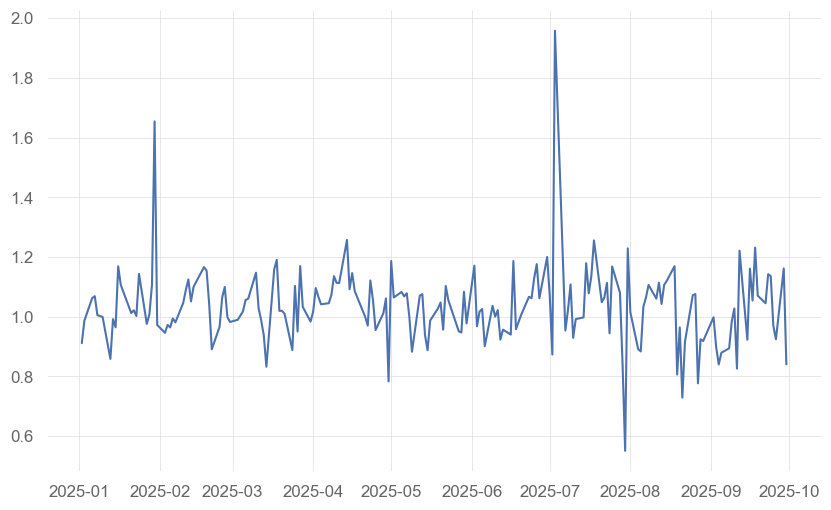

In [57]:
US_sds_ratio_MV = (
    dataUSA_MA_V
    .resample("D")
    .apply(lambda x: x["r_MA"].std() / x["r_V"].std())
    .to_frame(name = "sds_ratio_mv")
)

# keep non-missing values only
US_sds_ratio_MV = US_sds_ratio_MV.dropna()

# see how it changes over time
plt.plot(US_sds_ratio_MV.index, 
         US_sds_ratio_MV["sds_ratio_mv"])

In [58]:
US_sds_ratio_MV.index = US_sds_ratio_MV.index + pd.to_timedelta(np.where(US_sds_ratio_MV.index.day_name() == "Friday", "3D", "1D")) + pd.Timedelta("9h31m")

In [59]:
dataUSA_2 = dataUSA_MA_V.copy()
dataUSA_2 = dataUSA_2.merge(US_av_ratio_MV, 
                            # we want to use indexes 
                            # as merging keys
                            left_index = True, 
                            right_index = True, 
                            how = "left")
dataUSA_2 = dataUSA_2.merge(US_sds_ratio_MV, 
                            left_index = True, 
                            right_index = True, 
                            how = "left")

# lets see how it worked

dataUSA_2.between_time("09:31", "09:40").head(30)

,close_MA,close_V,r_MA,r_V,av_ratio_mv,sds_ratio_mv
timestamp,,,,,,
2025-01-02 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:32:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:33:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:34:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:35:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:36:00,523.5742,316.0439,-6.171051,-17.014796,NaN,NaN
2025-01-02 09:37:00,523.3256,316.2233,-4.749261,5.674816,NaN,NaN
2025-01-02 09:38:00,523.6389,316.2233,5.984921,0.000000,NaN,NaN
2025-01-02 09:39:00,523.8129,315.9243,3.322349,-9.459817,NaN,NaN


In [60]:
dataUSA_2[["av_ratio_mv", "sds_ratio_mv"]] = dataUSA_2[["av_ratio_mv", "sds_ratio_mv"]].ffill()

# and check the results
dataUSA_2.between_time("09:31", "09:40").head(30)

,close_MA,close_V,r_MA,r_V,av_ratio_mv,sds_ratio_mv
timestamp,,,,,,
2025-01-02 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:32:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:33:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:34:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:35:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02 09:36:00,523.5742,316.0439,-6.171051,-17.014796,NaN,NaN
2025-01-02 09:37:00,523.3256,316.2233,-4.749261,5.674816,NaN,NaN
2025-01-02 09:38:00,523.6389,316.2233,5.984921,0.000000,NaN,NaN
2025-01-02 09:39:00,523.8129,315.9243,3.322349,-9.459817,NaN,NaN


In [61]:
dataUSA_2.index.day_name().value_counts()

timestamp
Tuesday      15210
Wednesday    14820
Thursday     14430
Friday       14430
Monday       13650
Name: count, dtype: int64

In [62]:
dataUSA_2["spread_avratio_mv"] = dataUSA_2["close_MA"] - dataUSA_2["av_ratio_mv"] * dataUSA_2["close_V"]
dataUSA_2["spread_sdsratio_mv"] = dataUSA_2["r_MA"] - dataUSA_2["sds_ratio_mv"] * dataUSA_2["r_V"]

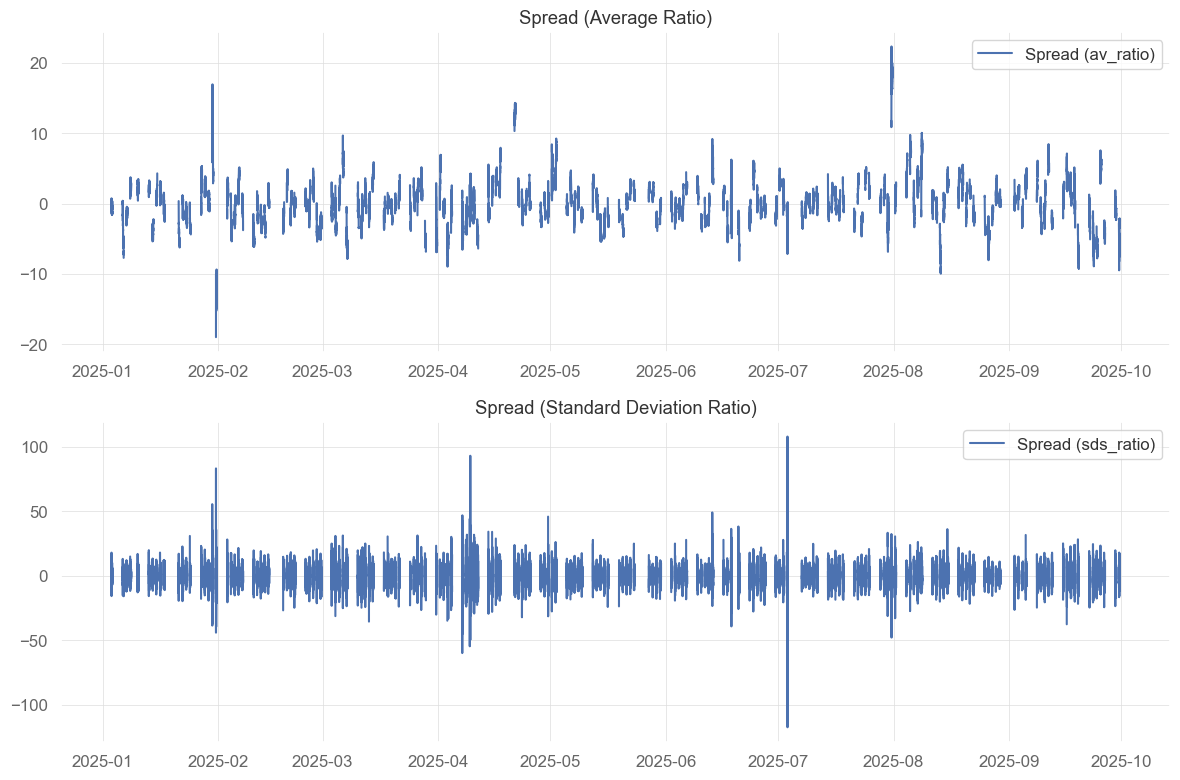

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

axes[0].plot(dataUSA_2.index, 
             dataUSA_2["spread_avratio_mv"], 
             label = "Spread (av_ratio)")
axes[0].set_title("Spread (Average Ratio)")
axes[0].legend()

axes[1].plot(dataUSA_2.index, 
             dataUSA_2["spread_sdsratio_mv"], 
             label = "Spread (sds_ratio)")
axes[1].set_title("Spread (Standard Deviation Ratio)")
axes[1].legend()

plt.tight_layout()
plt.show()

In [64]:
dataUSA_2["std_spread_avratio_mv"] = dataUSA_2["spread_avratio_mv"].rolling(window=120).std()
dataUSA_2["std_spread_sdsratio_mv"] = dataUSA_2["spread_sdsratio_mv"].rolling(window=120).std()

dataUSA_2.loc[dataUSA_2["close_MA"].isna(), ["std_spread_avratio_mv", "std_spread_sdsratio_mv"]] = np.nan


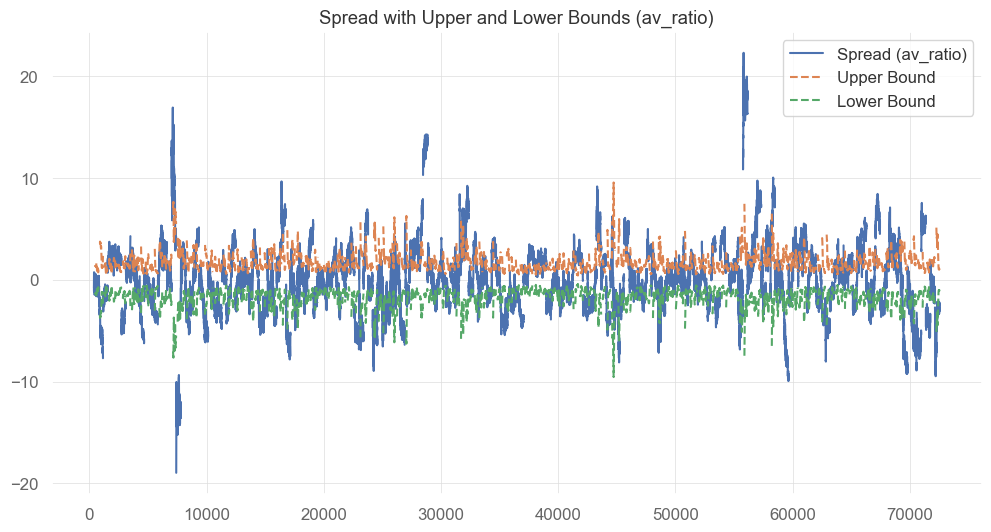

In [65]:
dataUSA_2["upper_bound_avratio"] = 3 * dataUSA_2["std_spread_avratio_mv"]
dataUSA_2["lower_bound_avratio"] = -3 * dataUSA_2["std_spread_avratio_mv"]

# lets see how it looks like
# ignoring time dimension for clarity

dataUSA_2_plot = dataUSA_2.reset_index()
plt.figure(figsize=(12, 6))
plt.plot(dataUSA_2_plot.index, 
         dataUSA_2_plot["spread_avratio_mv"], 
         label="Spread (av_ratio)")
plt.plot(dataUSA_2_plot.index, 
         dataUSA_2_plot["upper_bound_avratio"], 
         label="Upper Bound", linestyle='--')
plt.plot(dataUSA_2_plot.index, 
         dataUSA_2_plot["lower_bound_avratio"], 
         label="Lower Bound", linestyle='--')
plt.title("Spread with Upper and Lower Bounds (av_ratio)")
plt.legend()
plt.show()  

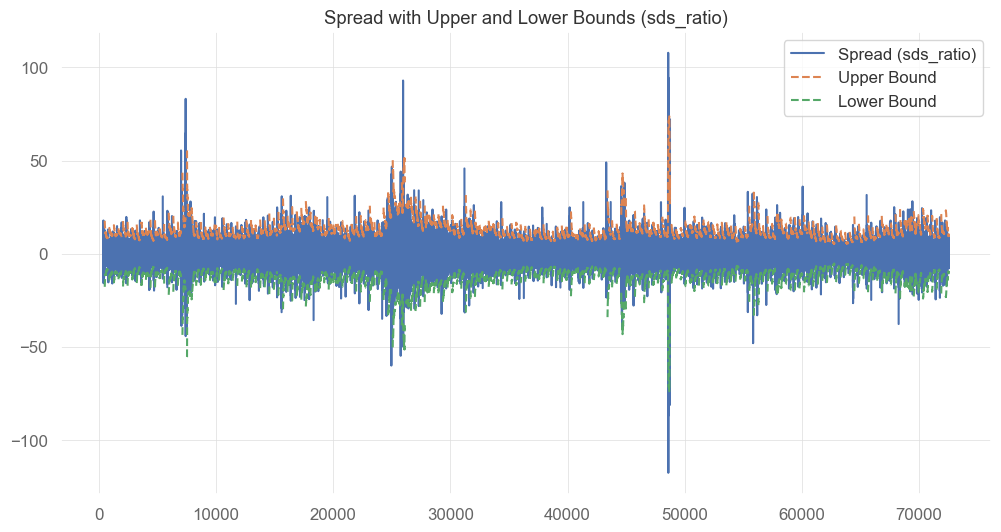

In [66]:
dataUSA_2["upper_bound_sdsratio"] = 3 * dataUSA_2["std_spread_sdsratio_mv"]
dataUSA_2["lower_bound_sdsratio"] = -3 * dataUSA_2["std_spread_sdsratio_mv"]

# lets see how it looks like
# ignoring time dimension for clarity
dataUSA_2_plot = dataUSA_2.reset_index()
plt.figure(figsize=(12, 6))
plt.plot(dataUSA_2_plot.index, 
         dataUSA_2_plot["spread_sdsratio_mv"], 
         label="Spread (sds_ratio)")
plt.plot(dataUSA_2_plot.index, 
         dataUSA_2_plot["upper_bound_sdsratio"],
         label="Upper Bound", linestyle='--')
plt.plot(dataUSA_2_plot.index, 
         dataUSA_2_plot["lower_bound_sdsratio"],
         label="Lower Bound", linestyle='--')
plt.title("Spread with Upper and Lower Bounds (sds_ratio)")
plt.legend()
plt.show()

In [67]:
pos_flat = np.zeros(len(dataUSA_2))

In [68]:
pos_flat[dataUSA_2.index.time <= pd.to_datetime("9:45").time()] = 1
pos_flat[dataUSA_2.index.time >= pd.to_datetime("15:46").time()] = 1
pd.Series(pos_flat).value_counts()

0.0    66960
1.0     5580
Name: count, dtype: int64

In [69]:
dataUSA_2["pos_avratio_mv"] = positionVB(signal = dataUSA_2["spread_avratio_mv"],
                                      lower = dataUSA_2["lower_bound_avratio"],
                                      upper = dataUSA_2["upper_bound_avratio"],
                                      pos_flat = pos_flat,
                                      # IMPORTANT !!!!
                                      strategy = "mr")

dataUSA_2["pos_avratio_mv"].value_counts()

pos_avratio_mv
 0.0    34216
 1.0    20012
-1.0    18312
Name: count, dtype: int64

In [70]:
dataUSA_2["n_trans_avratio_mv"] = np.abs(np.diff(dataUSA_2["pos_avratio_mv"], prepend = 0))

In [71]:
dataUSA_2["pnl_gross_avratio_mv"] = dataUSA_2["pos_avratio_mv"] * (dataUSA_2["close_MA"].diff() - dataUSA_2["av_ratio_mv"] * dataUSA_2["close_V"].diff())

In [72]:
trcost_MA = round(dataUSA_close["close_MA"].mean() * 0.0005, 2)
trcost_V = round(dataUSA_close["close_V"].mean() * 0.0005, 2)

print(f"Trading cost per transaction for MA: {trcost_MA:.2f} USD")
print(f"Trading cost per transaction for V: {trcost_V:.2f} USD")

Trading cost per transaction for MA: 0.28 USD
Trading cost per transaction for V: 0.17 USD


In [73]:
dataUSA_2["pnl_net_avratio_mv"] = dataUSA_2["pnl_gross_avratio_mv"] - dataUSA_2["n_trans_avratio_mv"] * (trcost_MA + dataUSA_2["av_ratio_mv"] * trcost_V)

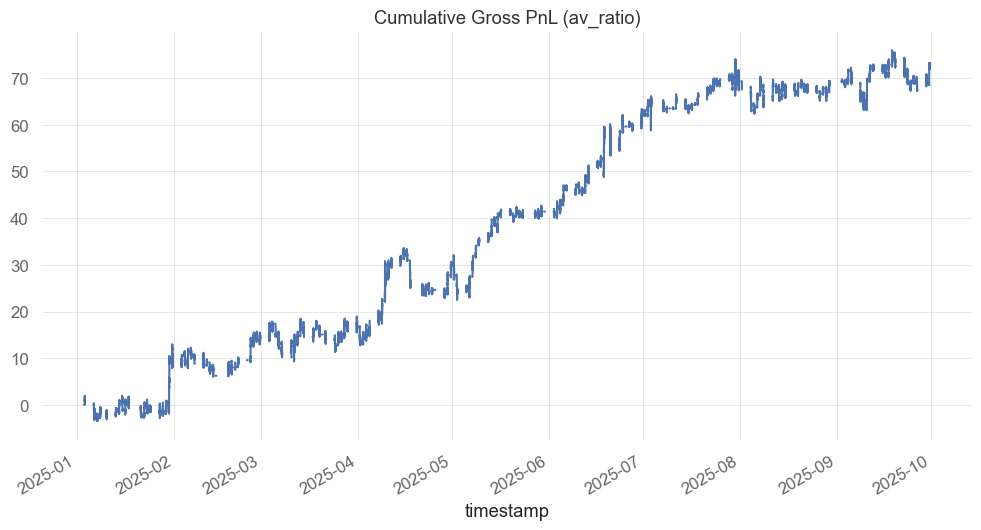

In [74]:
dataUSA_2["pnl_gross_avratio_mv"].cumsum().plot(figsize=(12,6), 
                                             title="Cumulative Gross PnL (av_ratio)")
plt.show()

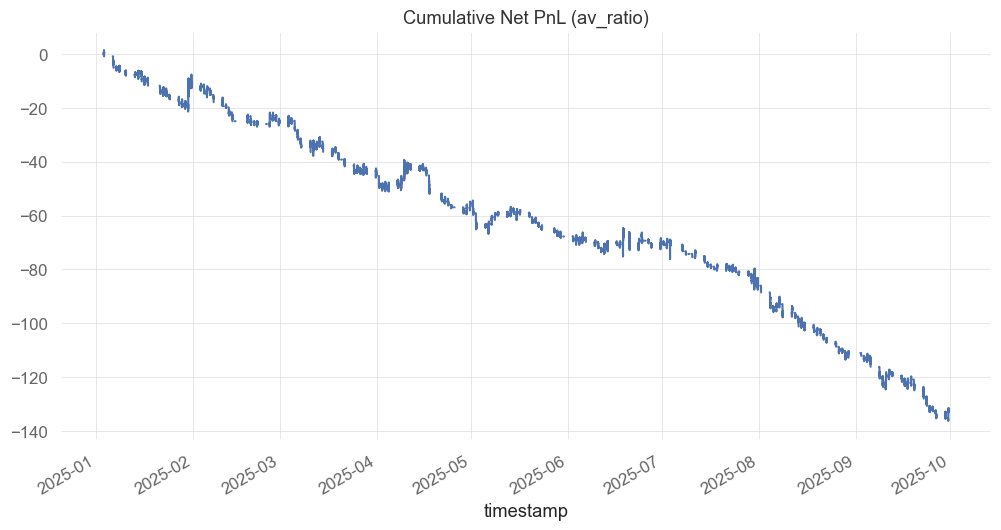

In [75]:
dataUSA_2["pnl_net_avratio_mv"].cumsum().plot(figsize=(12,6), 
                                           title="Cumulative Net PnL (av_ratio)")
plt.show()

In [76]:
# lets do a comparison within a loop for spread_avratio and spread_sdsratio

def mySR(x, scale):
    return np.sqrt(scale) * np.nanmean(x) / np.nanstd(x)

volat_sd_parameters = [60, 90, 120, 150, 180]
m_parameters = [0.5, 1, 1.5, 2, 2.5, 3, 3.5]

# create a dataframe to store results
summary_all_MA_V = pd.DataFrame()

for volat_sd in volat_sd_parameters:
    for m in m_parameters:
        print(f"volat_sd: {volat_sd}, m: {m}")

        # calculate teh elements of the strategy
        close_MA = dataUSA_2["close_MA"]
        close_V = dataUSA_2["close_V"]

        # spread based on average ratio
        signal_avratio = close_MA - (dataUSA_2["av_ratio_mv"] * close_V)
        std_spread_avratio_mv = signal_avratio.rolling(window=volat_sd).std()
        upper_bound_avratio = m * std_spread_avratio_mv
        lower_bound_avratio = -m * std_spread_avratio_mv
        # position
        pos_avratio_mv = positionVB(signal = signal_avratio,
                                lower = lower_bound_avratio,
                                upper = upper_bound_avratio,
                                pos_flat = pos_flat,
                                strategy = "mr")
        # number of transactions
        n_trans_avratio = np.abs(np.diff(pos_avratio_mv, prepend = 0))
        # convert to pd.Series and set the index
        n_trans_avratio = pd.Series(n_trans_avratio, index=dataUSA_2.index)

        # gross and net PnL
        pnl_gross_avratio = pos_avratio_mv * (dataUSA_2["close_MA"].diff() - dataUSA_2["av_ratio_mv"] * dataUSA_2["close_V"].diff())
        pnl_net_avratio = pnl_gross_avratio - n_trans_avratio * (trcost_MA + dataUSA_2["av_ratio_mv"] * trcost_PEP)

        # spread based on standard deviation ratio
        signal_sdsratio = dataUSA_2["spread_sdsratio_mv"]
        std_spread_sdsratio = signal_sdsratio.rolling(window=volat_sd).std()
        upper_bound_sdsratio = m * std_spread_sdsratio
        lower_bound_sdsratio = -m * std_spread_sdsratio
        # position
        pos_sdsratio = positionVB(signal = signal_sdsratio,
                                lower = lower_bound_sdsratio,
                                upper = upper_bound_sdsratio,
                                pos_flat = pos_flat,
                                strategy = "mr")
        
        # number of transactions
        n_trans_sdsratio = np.abs(np.diff(pos_sdsratio, prepend = 0))
        # convert to pd.Series and set the index
        n_trans_sdsratio = pd.Series(n_trans_sdsratio, index=dataUSA_2.index)

        # !!!!! signal is based on returns, but PnL on prices !!!!
        pnl_gross_sdsratio = pos_sdsratio * (dataUSA_2["close_MA"].diff() - dataUSA_2["sds_ratio_mv"] * dataUSA_2["close_V"].diff())
        pnl_net_sdsratio = pnl_gross_sdsratio - n_trans_sdsratio * (trcost_MA + dataUSA_2["sds_ratio_mv"] * trcost_V)

        # aggregate to daily
        pnl_gross_avratio_daily = pnl_gross_avratio.resample("D").sum().dropna()
        pnl_gross_sdsratio_daily = pnl_gross_sdsratio.resample("D").sum().dropna()
        pnl_net_avratio_daily = pnl_net_avratio.resample("D").sum().dropna()
        pnl_net_sdsratio_daily = pnl_net_sdsratio.resample("D").sum().dropna()
        n_trans_avratio_daily = n_trans_avratio.resample("D").sum().dropna()
        n_trans_sdsratio_daily = n_trans_sdsratio.resample("D").sum().dropna()

        # calculate summary measures
        gross_SR_avratio = mySR(pnl_gross_avratio_daily, scale = 252)
        net_SR_avratio = mySR(pnl_net_avratio_daily, scale = 252)
        gross_PnL_avratio = pnl_gross_avratio_daily.sum()
        net_PnL_avratio = pnl_net_avratio_daily.sum()
        av_daily_ntrans_avratio = n_trans_avratio_daily.mean()
        
        gross_SR_sdsratio = mySR(pnl_gross_sdsratio_daily, scale = 252)
        net_SR_sdsratio = mySR(pnl_net_sdsratio_daily, scale = 252)
        gross_PnL_sdsratio = pnl_gross_sdsratio_daily.sum()
        net_PnL_sdsratio = pnl_net_sdsratio_daily.sum()
        av_daily_ntrans_sdsratio = n_trans_sdsratio_daily.mean()
        
        # Collect the necessary results into one object
        summary = pd.DataFrame({
                'volat_sd': volat_sd,
                'm': m,
                'period': '2025Q1-Q3',
                'gross_SR_avratio': gross_SR_avratio,
                'net_SR_avratio': net_SR_avratio,
                'gross_PnL_avratio': gross_PnL_avratio,
                'net_PnL_avratio': net_PnL_avratio,
                'av_daily_ntrans_avratio': av_daily_ntrans_avratio,
                'gross_SR_sdsratio': gross_SR_sdsratio,
                'net_SR_sdsratio': net_SR_sdsratio,
                'gross_PnL_sdsratio': gross_PnL_sdsratio,
                'net_PnL_sdsratio': net_PnL_sdsratio,
                'av_daily_ntrans_sdsratio': av_daily_ntrans_sdsratio
                }, index=[0])

        # Append the results to the summary
        summary_all_MA_V = pd.concat([summary_all_MA_V, 
                                        summary], 
                                    ignore_index = True)

# it takes about 3 minutes to run

volat_sd: 60, m: 0.5
volat_sd: 60, m: 1
volat_sd: 60, m: 1.5
volat_sd: 60, m: 2
volat_sd: 60, m: 2.5
volat_sd: 60, m: 3
volat_sd: 60, m: 3.5
volat_sd: 90, m: 0.5
volat_sd: 90, m: 1
volat_sd: 90, m: 1.5
volat_sd: 90, m: 2
volat_sd: 90, m: 2.5
volat_sd: 90, m: 3
volat_sd: 90, m: 3.5
volat_sd: 120, m: 0.5
volat_sd: 120, m: 1
volat_sd: 120, m: 1.5
volat_sd: 120, m: 2
volat_sd: 120, m: 2.5
volat_sd: 120, m: 3
volat_sd: 120, m: 3.5
volat_sd: 150, m: 0.5
volat_sd: 150, m: 1
volat_sd: 150, m: 1.5
volat_sd: 150, m: 2
volat_sd: 150, m: 2.5
volat_sd: 150, m: 3
volat_sd: 150, m: 3.5
volat_sd: 180, m: 0.5
volat_sd: 180, m: 1
volat_sd: 180, m: 1.5
volat_sd: 180, m: 2
volat_sd: 180, m: 2.5
volat_sd: 180, m: 3
volat_sd: 180, m: 3.5


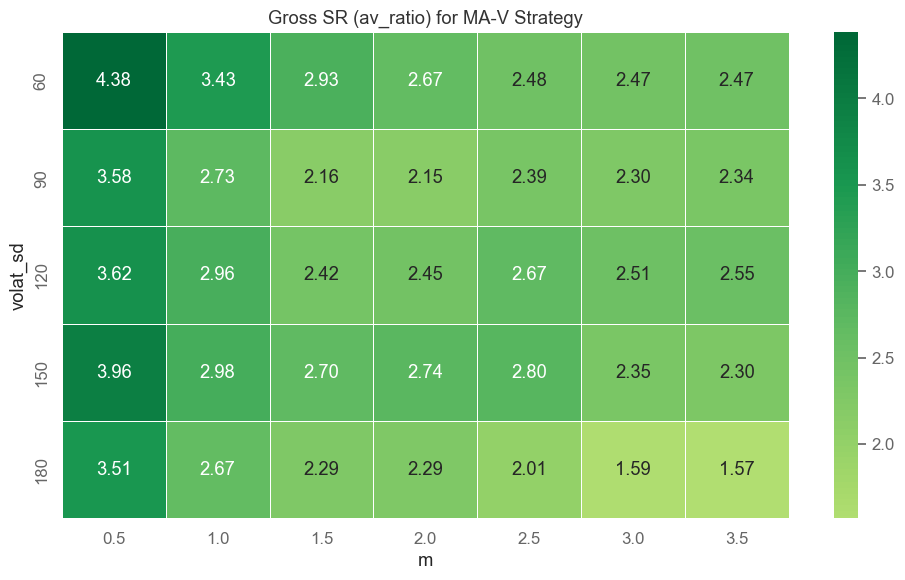

In [77]:
plot_heatmap(summary_all_MA_V, 
             value_col = "gross_SR_avratio", 
             index_col = "volat_sd", 
             columns_col = "m", 
             title = "Gross SR (av_ratio) for MA-V Strategy")

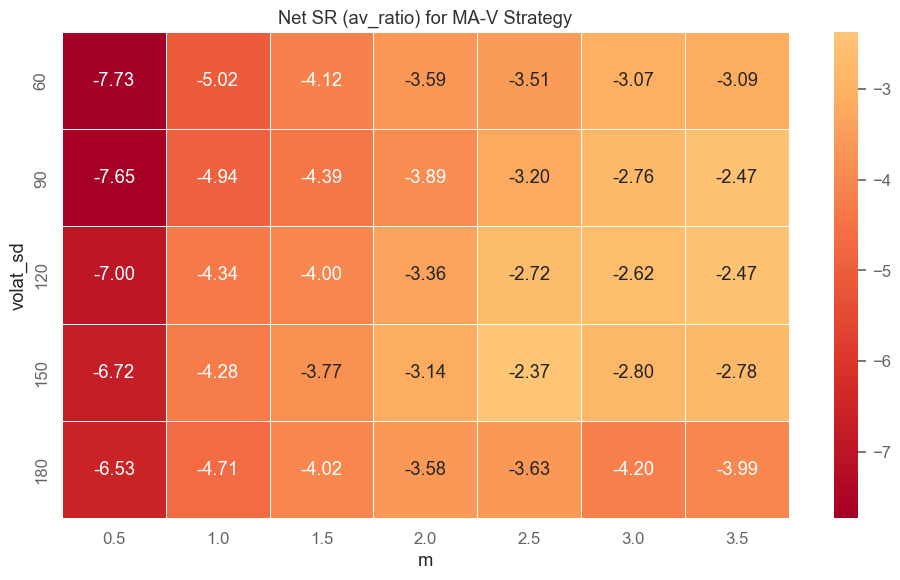

In [78]:
plot_heatmap(summary_all_MA_V,
             value_col = "net_SR_avratio", 
             index_col = "volat_sd", 
             columns_col = "m", 
             title = "Net SR (av_ratio) for MA-V Strategy")

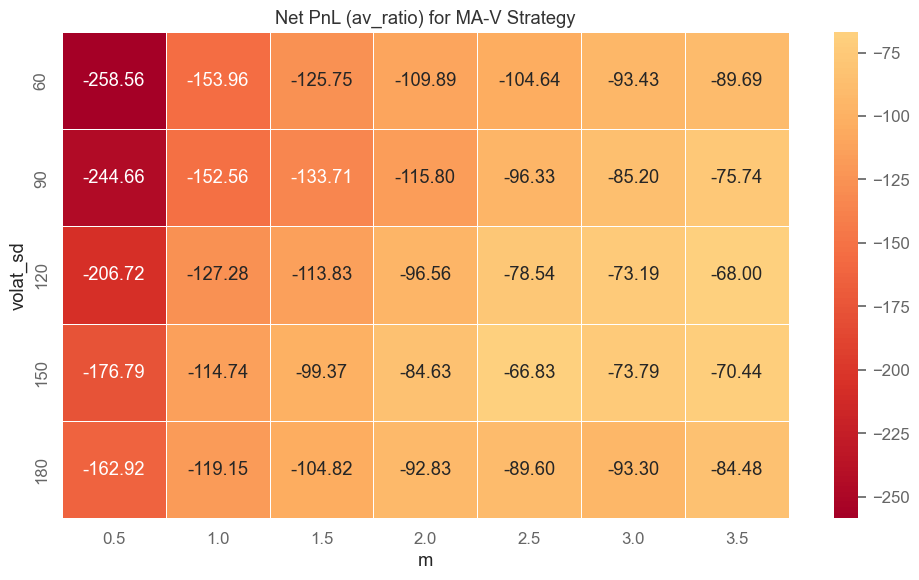

In [79]:
plot_heatmap(summary_all_MA_V,
             value_col = "net_PnL_avratio", 
             index_col = "volat_sd", 
             columns_col = "m", 
             title = "Net PnL (av_ratio) for MA-V Strategy")

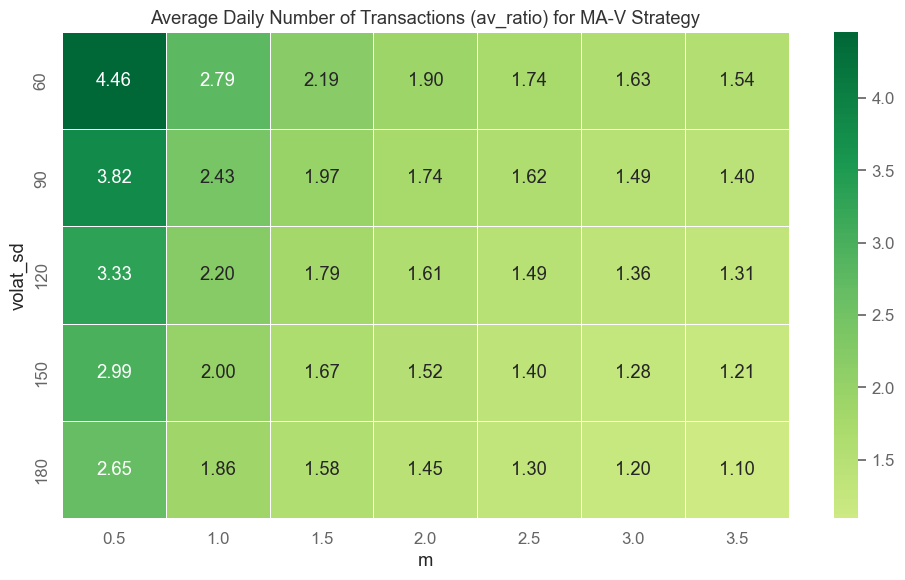

In [80]:
plot_heatmap(summary_all_MA_V,
             value_col = "av_daily_ntrans_avratio",
             index_col = "volat_sd",
             columns_col = "m",
             title = "Average Daily Number of Transactions (av_ratio) for MA-V Strategy")

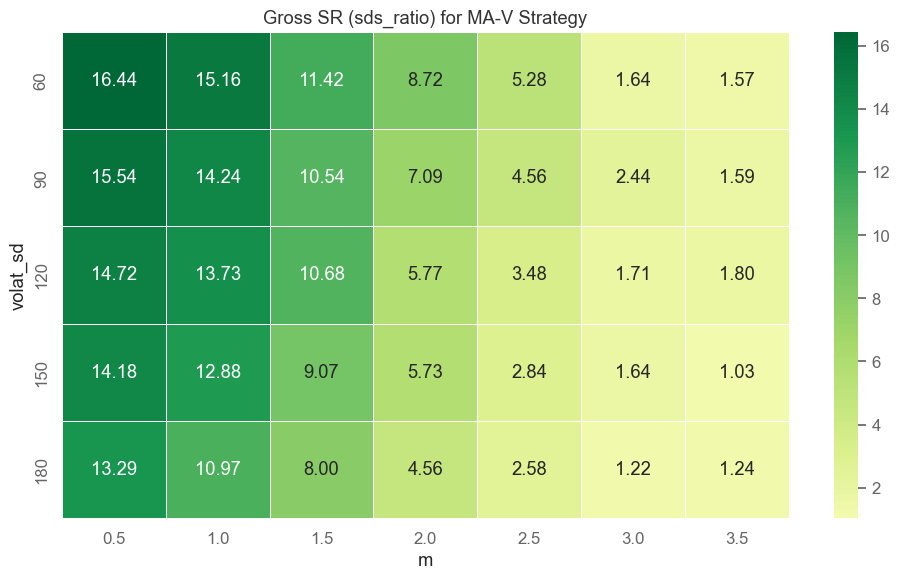

In [81]:
plot_heatmap(summary_all_MA_V, 
             value_col = "gross_SR_sdsratio", 
             index_col = "volat_sd", 
             columns_col = "m", 
             title = "Gross SR (sds_ratio) for MA-V Strategy")

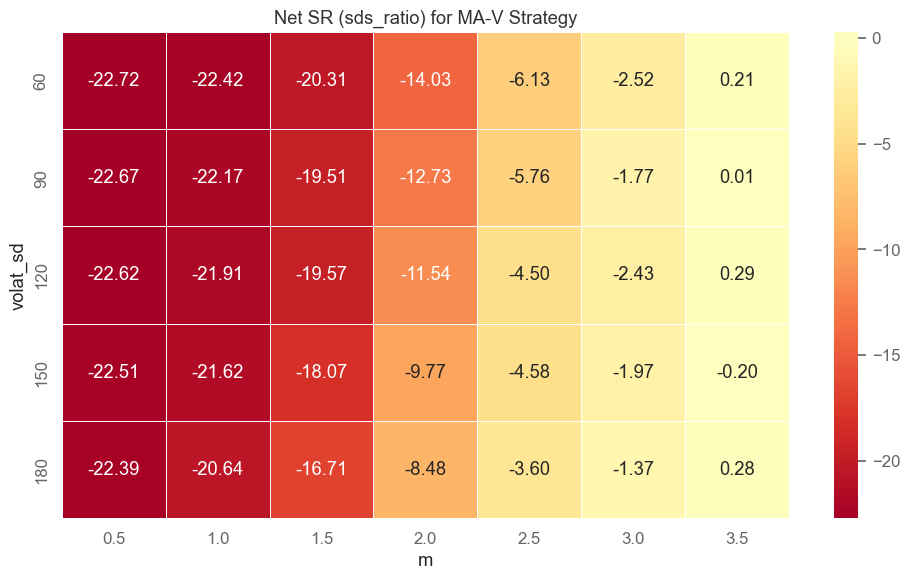

In [82]:
plot_heatmap(summary_all_MA_V,
             value_col = "net_SR_sdsratio", 
             index_col = "volat_sd", 
             columns_col = "m", 
             title = "Net SR (sds_ratio) for MA-V Strategy")

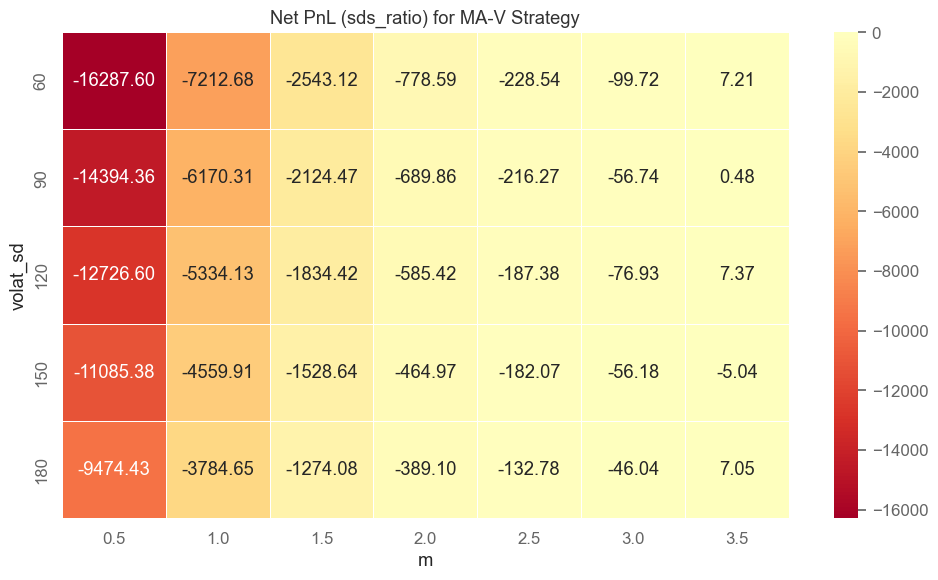

In [83]:
plot_heatmap(summary_all_MA_V,
             value_col = "net_PnL_sdsratio", 
             index_col = "volat_sd", 
             columns_col = "m", 
             title = "Net PnL (sds_ratio) for MA-V Strategy")

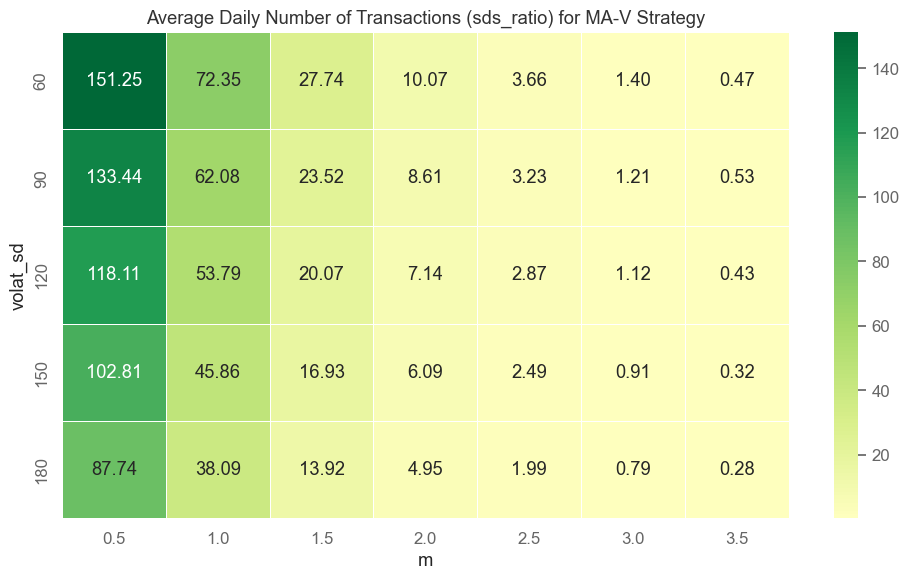

In [84]:
plot_heatmap(summary_all_MA_V,
             value_col = "av_daily_ntrans_sdsratio",
             index_col = "volat_sd",
             columns_col = "m",
             title = "Average Daily Number of Transactions (sds_ratio) for MA-V Strategy")

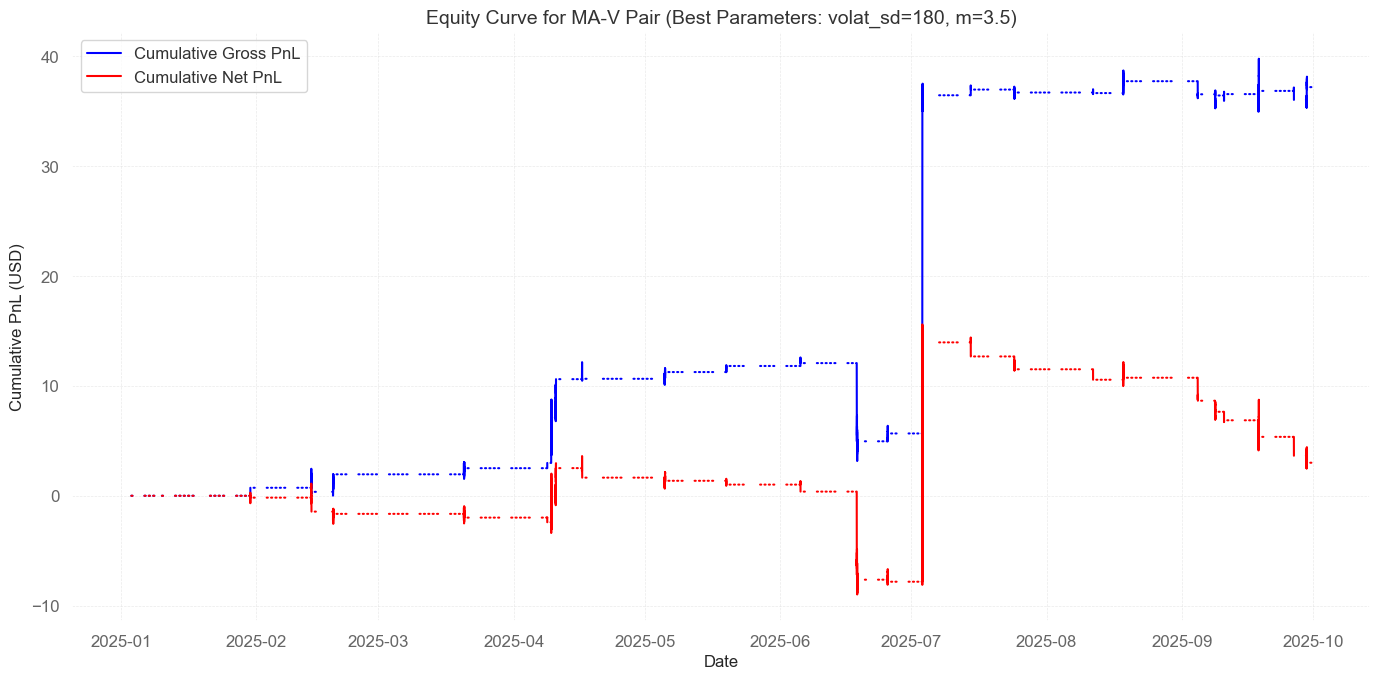

In [85]:
best_volat_sd = 180
best_m = 3.5

signal_sdsratio_mv = dataUSA_2["spread_sdsratio_mv"]  
std_spread_sdsratio_mv = signal_sdsratio_mv.rolling(window=best_volat_sd).std()
upper_bound_sdsratio_mv = best_m * std_spread_sdsratio_mv
lower_bound_sdsratio_mv = -best_m * std_spread_sdsratio_mv

pos_sdsratio_mv = positionVB(
    signal=signal_sdsratio_mv,
    lower=lower_bound_sdsratio_mv,
    upper=upper_bound_sdsratio_mv,
    pos_flat=pos_flat,
    strategy="mr"
)

if not isinstance(pos_sdsratio_mv, pd.Series):
    pos_sdsratio_mv = pd.Series(pos_sdsratio_mv, index=dataUSA_2.index)

n_trans_sdsratio_mv = np.abs(np.diff(pos_sdsratio_mv, prepend=0))
n_trans_sdsratio_mv = pd.Series(n_trans_sdsratio_mv, index=pos_sdsratio_mv.index)

pnl_gross_sdsratio_mv = pos_sdsratio_mv * (
    dataUSA_2["close_MA"].diff() - 
    dataUSA_2["av_ratio_mv"] * dataUSA_2["close_V"].diff()
)

trcost_MA = 0.28  
trcost_V = 0.17
pnl_net_sdsratio_mv = pnl_gross_sdsratio_mv - n_trans_sdsratio_mv * (trcost_MA + trcost_V)

cum_pnl_gross_mv = pnl_gross_sdsratio_mv.cumsum()
cum_pnl_net_mv = pnl_net_sdsratio_mv.cumsum()

plt.figure(figsize=(14, 7))

plt.plot(cum_pnl_gross_mv.index, cum_pnl_gross_mv, 
         label='Cumulative Gross PnL', color='blue', linewidth=1.5)

plt.plot(cum_pnl_net_mv.index, cum_pnl_net_mv, 
         label='Cumulative Net PnL', color='red', linewidth=1.5)

plt.title('Equity Curve for MA-V Pair (Best Parameters: volat_sd=180, m=3.5)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative PnL (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [86]:
dataUSA_2.to_parquet("dataUSA_2_MA_V.parquet")
summary_all_KO_PEP.to_parquet("summary_all_MA_V.parquet")